# Case study for **Lending Club data analysis.** 
The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

**General Information**

The goal of this analysis is to understand how different factors about the borrower and the loan itself affect the chances of a loan not being repaid. This helps the company make better decisions about who to approve for loans, how much to lend, and what interest rates to set, ultimately reducing financial losses and maximising business opportunities.

**Approach**

To identify the factors influencing loan repayment and default, a detailed univariate and bivariate analysis was conducted:

**Fields that were considered for analysis**
- **Numerical Fields** : ['annual_inc','loan_amnt','funded_amnt', 'funded_amnt_inv', 'int_rate','installment', 'dti','delinq_2yrs','revol_util']
- **Categorical Columns** :['emp_length','grade','sub_grade','home_ownership', 'purpose','verification_status']
- **Derived Columns** :['Issue Year', 'Issue Month', 'loan_amnt_groups', 'interest_groups']


**Univariate Analysis:**

- Examined the distribution of individual variables like loan amount, interest rate, installment size, annual inc, and loan term .
- Categorical Variable Analysis Analyse the distribution of loan status, loan grades, borrower housing status, purpose, verification status

**Bivariate Analysis:**

Investigated relationships between pairs of variables, such as loan amount vs. interest rate and income vs. loan grade.
Identifed patterns and correlations that may indicate risk factors for loan defaults.



In [188]:
#Import the libraries needed for analysis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
#Read the data from the file
lc = pd.read_csv('loan.csv')

C:\Users\venkats\AppData\Local\Temp\ipykernel_32048\1583322563.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lc = pd.read_csv('loan.csv')


In [190]:
# Identiy the shape of the data
lc.shape

(39717, 111)

In [191]:
# View the data
lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [192]:
#List columns
list(lc.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

#### Data cleanup and Modification

In [193]:
#Find how many columns have missing values  

missing = lc.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

last_credit_pull_d                2
title                            11
tax_liens                        39
revol_util                       50
collections_12_mths_ex_med       56
                              ...  
total_bc_limit                39717
bc_open_to_buy                39717
bc_util                       39717
mo_sin_old_rev_tl_op          39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

In [194]:
# Checking columns for null value percentage
print((lc.isnull().sum()/lc.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [195]:
#Remove all the columns that has more than 50% missing values

lc = lc.loc[:,lc.isnull().sum()/lc.shape[0]*100<50]
print(lc.shape)

(39717, 54)


In [196]:
# Checking columns again for null value percentage
print((lc.isnull().sum()/lc.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [197]:
# List all the columns and see if we can find only those columns that are important for analysis
print(list(lc.columns))


['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


**Create a new dataframe with *variables of interest***

Fields like Id, Member Id, Emp Title, url,  title, earliest cr line, out_prncp,  total pymt, recoveries, collection recovery fee .. tax_liens arent considered as they might not be impacting the loan completion or defaulting directly. This is mostly based on understaidng the fields and its defention. 
Other fields like address and Zip code arent considered as we arent focussing on DEMOGRAPHIC analysis. 
Desc field has complete English text and has 30%+ null. As this EDA and not the sentimental analysis, this column is also ignored. 
**Most Importantly Current Loans are ignored as the customers are still paying the loan installments and it may not be right data to consider**

In [198]:
loan = lc[(lc.loan_status =='Charged Off') | (lc.loan_status =='Fully Paid')][['annual_inc','loan_status','loan_amnt','emp_length','funded_amnt', 'funded_amnt_inv', 'term','issue_d','int_rate','installment', 'grade','sub_grade','dti','delinq_2yrs','home_ownership', 'revol_util', 'purpose','verification_status','pub_rec_bankruptcies']]
loan.shape

(38577, 19)

With these 19 Columns, perfoming EDA to review the variables that can be used to determine probablity of loan defulting

In [199]:
loan.head()

,annual_inc,loan_status,loan_amnt,emp_length,funded_amnt,funded_amnt_inv,term,issue_d,int_rate,installment,grade,sub_grade,dti,delinq_2yrs,home_ownership,revol_util,purpose,verification_status,pub_rec_bankruptcies
0,24000.0,Fully Paid,5000,10+ years,5000,4975.0,36 months,Dec-11,10.65%,162.87,B,B2,27.65,0,RENT,83.70%,credit_card,Verified,0.0
1,30000.0,Charged Off,2500,< 1 year,2500,2500.0,60 months,Dec-11,15.27%,59.83,C,C4,1.00,0,RENT,9.40%,car,Source Verified,0.0
2,12252.0,Fully Paid,2400,10+ years,2400,2400.0,36 months,Dec-11,15.96%,84.33,C,C5,8.72,0,RENT,98.50%,small_business,Not Verified,0.0
3,49200.0,Fully Paid,10000,10+ years,10000,10000.0,36 months,Dec-11,13.49%,339.31,C,C1,20.00,0,RENT,21%,other,Source Verified,0.0
5,36000.0,Fully Paid,5000,3 years,5000,5000.0,36 months,Dec-11,7.90%,156.46,A,A4,11.20,0,RENT,28.30%,wedding,Source Verified,0.0


In [200]:
# Check the remaining fields dataframe its Information

loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            38577 non-null  float64
 1   loan_status           38577 non-null  object 
 2   loan_amnt             38577 non-null  int64  
 3   emp_length            37544 non-null  object 
 4   funded_amnt           38577 non-null  int64  
 5   funded_amnt_inv       38577 non-null  float64
 6   term                  38577 non-null  object 
 7   issue_d               38577 non-null  object 
 8   int_rate              38577 non-null  object 
 9   installment           38577 non-null  float64
 10  grade                 38577 non-null  object 
 11  sub_grade             38577 non-null  object 
 12  dti                   38577 non-null  float64
 13  delinq_2yrs           38577 non-null  int64  
 14  home_ownership        38577 non-null  object 
 15  revol_util            38

In [201]:
# emp_length and revol_util are having null values. Determine the percentage of null values in the columns and decide on how to handle them
# find the percentage of nulls in the columns
loan.isnull().sum()/len(lc)*100


annual_inc              0.000000
loan_status             0.000000
loan_amnt               0.000000
emp_length              2.600901
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
issue_d                 0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
dti                     0.000000
delinq_2yrs             0.000000
home_ownership          0.000000
revol_util              0.125891
purpose                 0.000000
verification_status     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [202]:
# Since < 5% of EMp_length was null, impute with maximum occurence values. Here data is filtered with loan_status
loan.loc[(loan.emp_length.isna()), 'emp_length' ] = '10+ years'

In [203]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

##### Handle Emp Length field for mathemetical analysis

In [204]:
# convert emp_length column to float, year and years are removed and less than 1 is treated as 0 and 10+ as 10

loan.loc[:,'emp_length'] = loan.emp_length.str.replace(' years','').str.replace(' year','').str.replace('< 1','0').str.replace('+','')
loan.loc[:, 'emp_length' ] = loan.emp_length.apply(lambda x : float(x))

# convert interest rate field to float
loan.loc[:,'int_rate'] = loan.int_rate.str.replace('%','')
loan['int_rate'] = loan['int_rate'].astype(float)

#convert loan term to int

loan.loc[:,'term' ] = loan.loc[:,'term'].str.replace('months','').astype(int)



##### Handle Revol Util nulls

In [205]:

#find null count

loan.revol_util.isnull().sum() # 50 rows out of 39K are null. these rows can be ignored

loan = loan[~(loan.revol_util.isnull())]

loan['revol_util'] =loan.revol_util.apply(lambda x : float(x.split('%')[0]))

#### Derived Fields
**From the variables of interst identify, other derived fields that are required for analyis and create them. These are secondary attributes**

##### Date Field 

In [206]:
# covert str to datetime

loan['issue_date'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

loan.loc[:,'issue_month'] = loan.issue_date.dt.month
loan.loc[:, 'issue_year'] = loan.issue_date.dt.year

In [207]:
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels=['0-40k','40k-80k','80k-120k','120k-160k','160k-200k'])


In [208]:
loan['annual_inc_groups'].value_counts()

annual_inc_groups
0-40k        38519
40k-80k          6
120k-160k        1
160k-200k        1
80k-120k         0
Name: count, dtype: int64

##### Additional derived fields

In [209]:
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['interest_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5-10','10-15','15-20','20-25','25-30'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels=['0-40k','40k-80k','80k-120k','120k-160k','160k-200k'])
loan['sub_grade_groups'] = loan['sub_grade'].str[1]


##### Identify the columns that are categorical and convert them to category type

In [210]:

cat_columns = loan.select_dtypes(include=['object']).columns
num_columns = loan.select_dtypes(include=['float64', 'int64']).columns
print(cat_columns)
print(num_columns)


Index(['loan_status', 'emp_length', 'term', 'issue_d', 'grade', 'sub_grade',
       'home_ownership', 'purpose', 'verification_status', 'sub_grade_groups'],
      dtype='object')
Index(['annual_inc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'dti', 'delinq_2yrs', 'revol_util',
       'pub_rec_bankruptcies'],
      dtype='object')


### Data Cleaned up so far, lets look into Visualitzation

#### Classify the data with loan status - Simple bar graph of the category variable

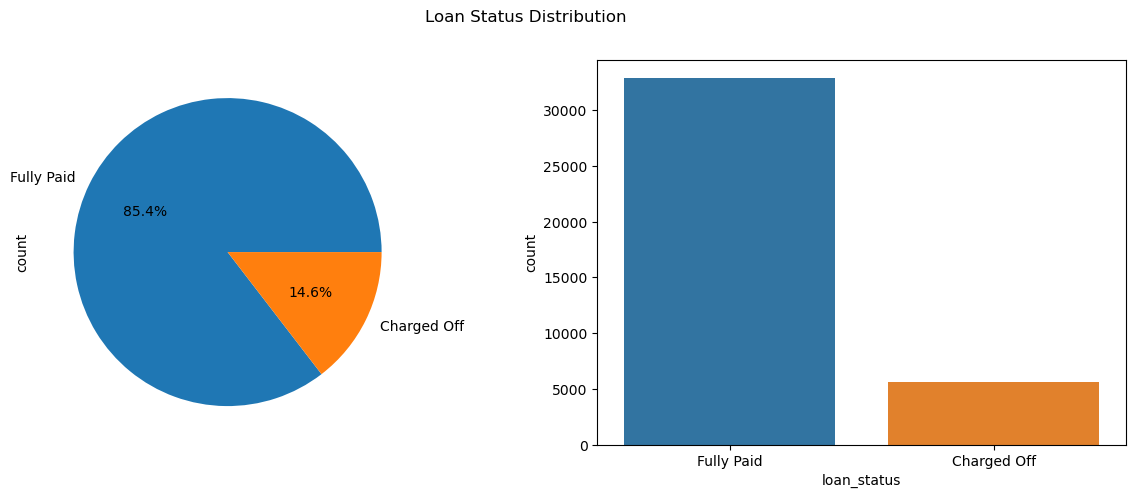

In [211]:
#Pie chart & bar chart side by side using subplot of loan status using seaborn different color for each loan status

fx, axes = plt.subplots(1,2, figsize=(15,5))

loan['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
sns.countplot(x='loan_status', data=loan, ax=axes[1])

fx.suptitle('Loan Status Distribution')
plt.show()




Inference: **Around 86% of the loans are fully paid and 16% are charged off**

### Continious Variable Univariate Analysis ###

##### Annual Income

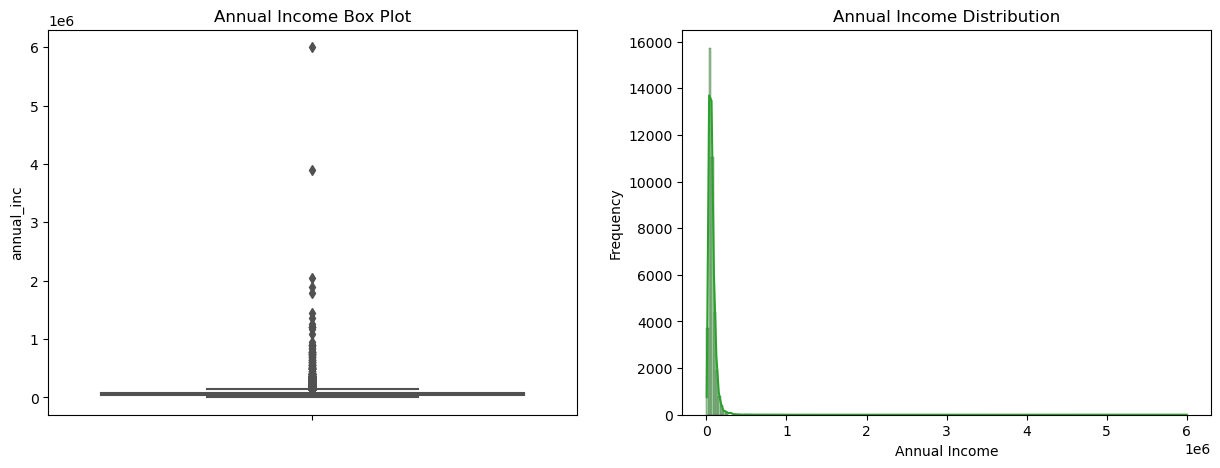

In [212]:
#Analyse lenders annual income distribution. Box Plot and bins of 10K using subplots

fx, axes = plt.subplots(1,2, figsize=(15,5))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

sns.boxplot(y='annual_inc', data=loan, color =colors[1],ax=axes[0])
sns.histplot(loan['annual_inc'], bins=range(0, 300000, 30000), color =colors[2], kde=True, ax=axes[1])
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Annual Income Distribution')
axes[0].set_title('Annual Income Box Plot')
plt.show()


As there are outliers in the annual income, we can remove the outliers and plot the box plot again
Considering only 95th percentile values. Also people with very high income are not the target customers for loan chance of paying back is high.

In [213]:
#As there are outliers in the annual income, we can remove the outliers and plot the box plot again

#95, 99, 99.5, 99.9 percentile values are calculated to remove the outliers

p95 = loan['annual_inc'].quantile(0.95)
p99 = loan['annual_inc'].quantile(0.99)
p995 = loan['annual_inc'].quantile(0.995)
p999 = loan['annual_inc'].quantile(0.999)

print('95th percentile: {:,.2f},  99th percentile: {:,.2f}, max: {:,.2f}'.format(p95, p99, loan['annual_inc'].max()))

loan = loan[(loan['annual_inc'] <= p95)]

95th percentile: 140,004.00,  99th percentile: 234,000.00, max: 6,000,000.00


In [214]:
# Update all derived fields after removing outliers
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['interest_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5-10','10-15','15-20','20-25','25-30'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels=['0-40k','40k-80k','80k-120k','120k-160k','160k-200k'])
loan['sub_grade_groups'] = loan['sub_grade'].str[1]
loan.shape


(36606, 26)

**Analyse Annual Income after removing outliers**

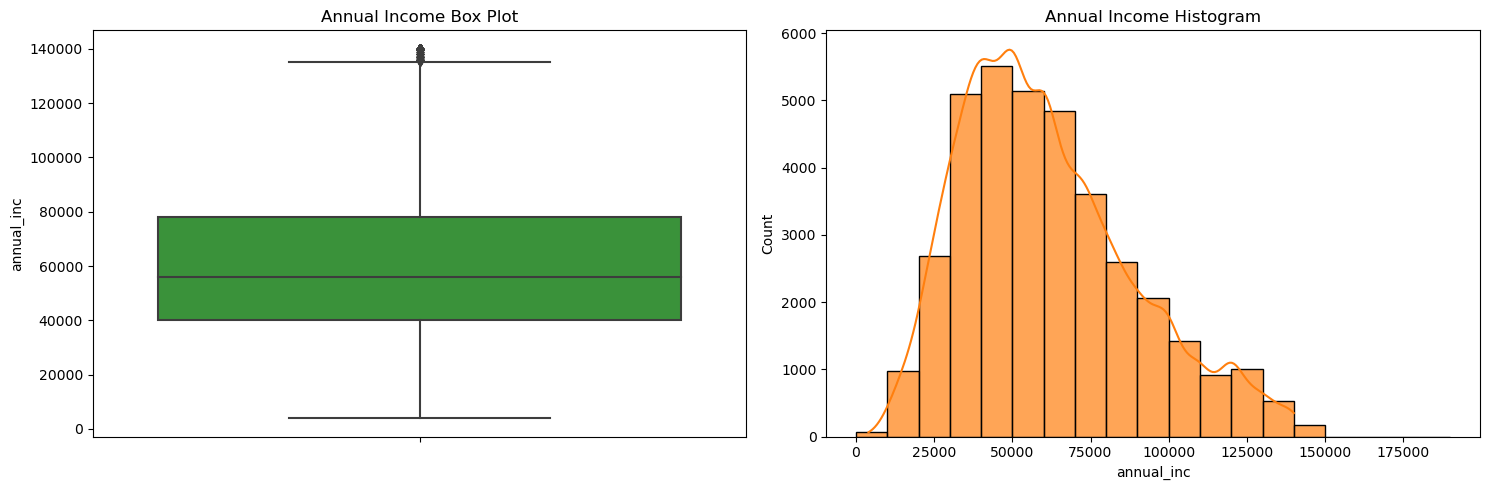

In [215]:
#Create a color list for future use.
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fx, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(y='annual_inc', data=loan, color=colors[2] ,ax=axes[0])
sns.histplot(loan['annual_inc'], bins=range(0, 200000, 10000), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
axes[0].set_title('Annual Income Box Plot')
axes[1].set_title('Annual Income Histogram')
plt.tight_layout()
plt.show()

***Inference*** - Most of the people who take loan have income range between 40K to 80K

#####  Analyse the loan amount distribution

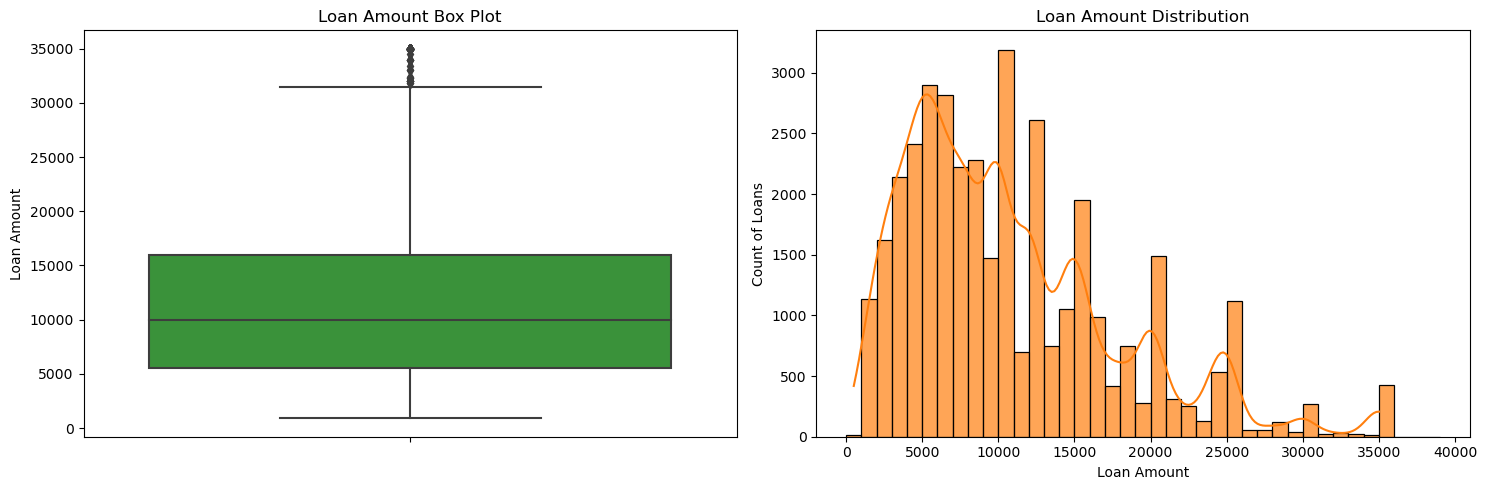

In [216]:


fx, axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(y='loan_amnt', data=loan[loan.loan_status =='Charged Off'], color=colors[2] ,ax=axes[0])
sns.histplot(loan['loan_amnt'], bins=range(0, 40000, 1000), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
axes[0].set_title('Loan Amount Box Plot')
axes[1].set_title('Loan Amount Distribution')
axes[0].set_ylabel('Loan Amount')
axes[1].set_xlabel('Loan Amount')
axes[1].set_ylabel('Count of Loans')
plt.tight_layout()

plt.show()

***Inference*** - Most of loans amount and funded amount is between 5k-15k, with highest range around 30-35K


#### Interest Rate

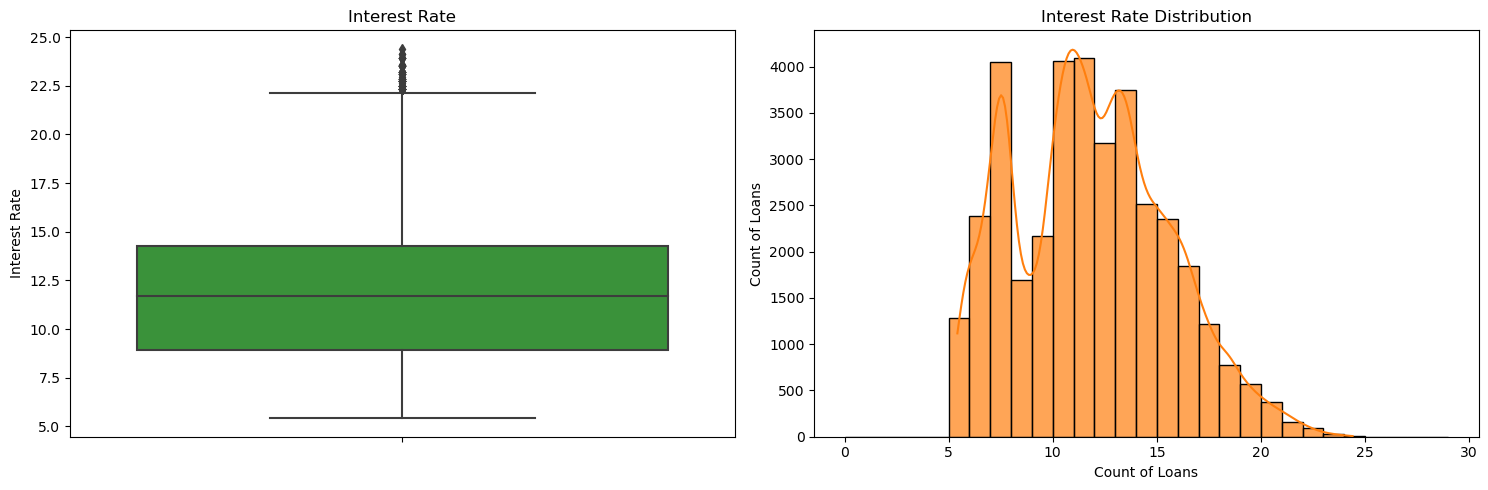

In [217]:
# Analyse the interest rate distribution using box plot and histplot with KDE

fx, axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(y='int_rate', data=loan, color=colors[2] ,ax=axes[0])
sns.histplot(loan['int_rate'], bins=range(0, 30, 1), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
axes[0].set_title('Interest Rate')
axes[1].set_title('Interest Rate Distribution')

axes[1].set_xlabel('Count of Loans')
axes[0].set_ylabel('Interest Rate')
axes[1].set_ylabel('Count of Loans')
plt.tight_layout()
plt.show()


**Inference**:  Majority of loans have Interest rate in the rage of 10-15%


##### Installment analysis

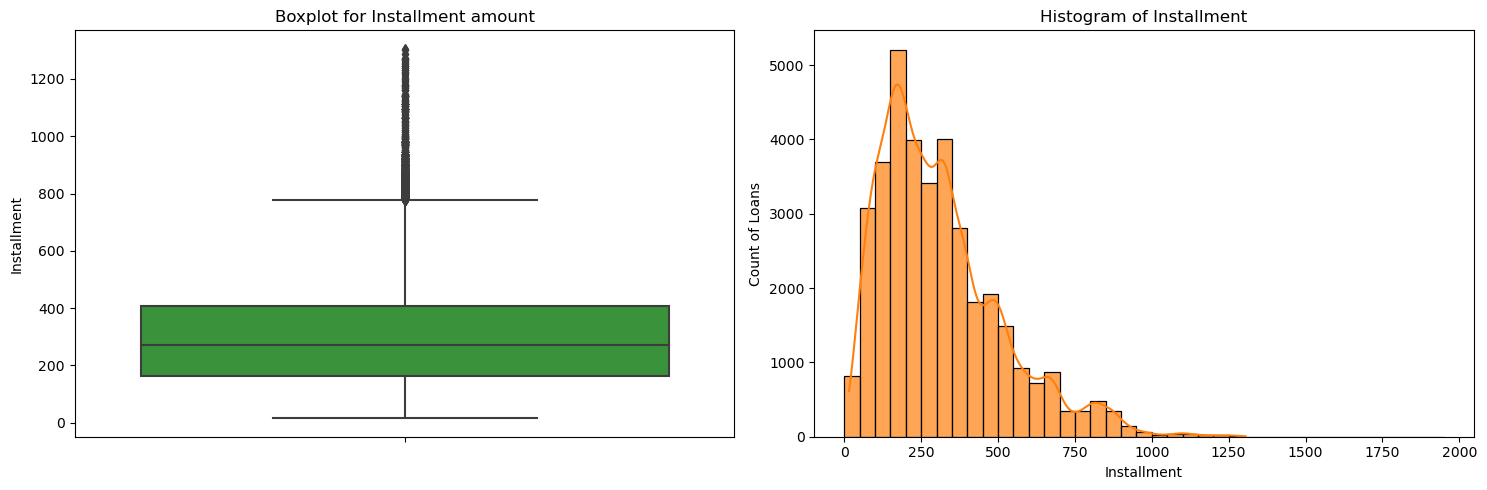

In [218]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(y='installment', data=loan, color=colors[2], ax=axes[0])
sns.histplot(loan['installment'], bins=range(0, 2000, 50), kde=True, color=colors[1], alpha=0.7,ax=axes[1])
axes[0].set_title('Boxplot for Installment amount')
axes[1].set_title('Histogram of Installment')
axes[1].set_xlabel('Installment')
axes[1].set_ylabel('Count of Loans')
axes[0].set_ylabel('Installment')
plt.tight_layout()
plt.show()


***Inference***: Installments are generally low between 200-400

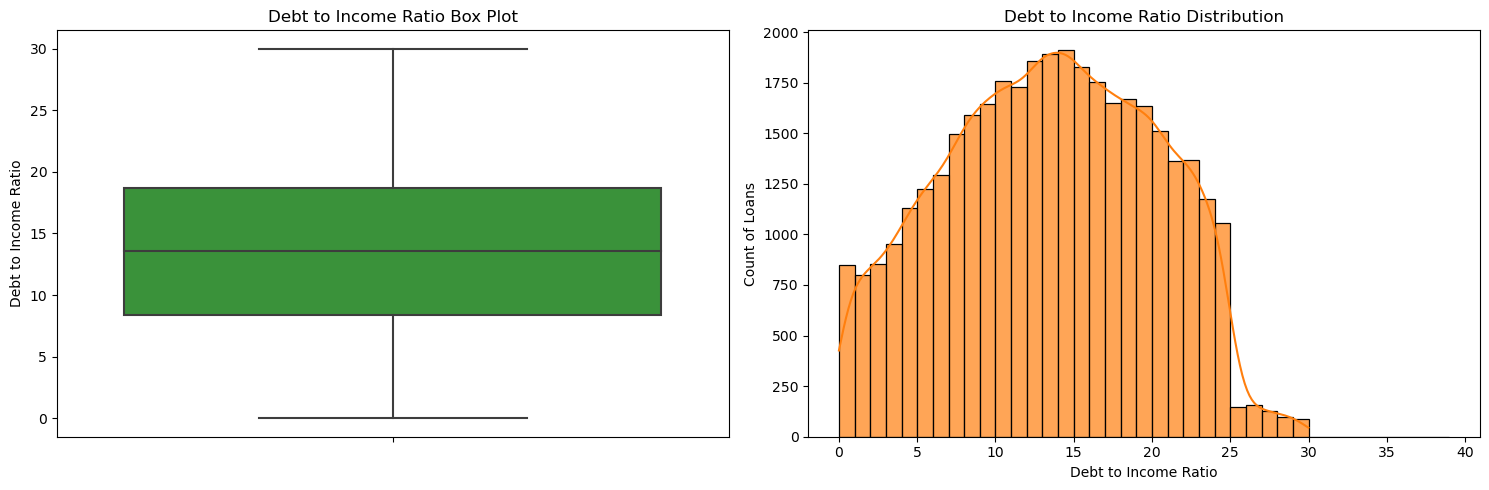

In [219]:
#analyse spread of DTEI using box plot and histplot with KDE

fx, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(y='dti', data=loan, color=colors[2] ,ax=axes[0])
sns.histplot(loan['dti'], bins=range(0, 40, 1), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
axes[0].set_title('Debt to Income Ratio Box Plot')
axes[1].set_title('Debt to Income Ratio Distribution')
axes[1].set_xlabel('Debt to Income Ratio')
axes[1].set_ylabel('Count of Loans')
axes[0].set_ylabel('Debt to Income Ratio')
plt.tight_layout()
plt.show()


**Inference**:Most of the borrowers have DTI ration between 10-20% of thier annual income. This in unsegmented data for charged off and fully paid loans.

##### Public Record Bankrupties

In [220]:
#analyse spread of pub_rec_bankruptcies using box plot and histplot with KDE

loan['pub_rec_bankruptcies'].value_counts()
loan['pub_rec_bankruptcies'].isnull().sum()/len(loan)*100
#there is 1.9% null values in pub_rec_bankruptcies. We can impute with 0 which is almost of 90%
loan.loc[loan['pub_rec_bankruptcies'].isnull(), 'pub_rec_bankruptcies'] = 0


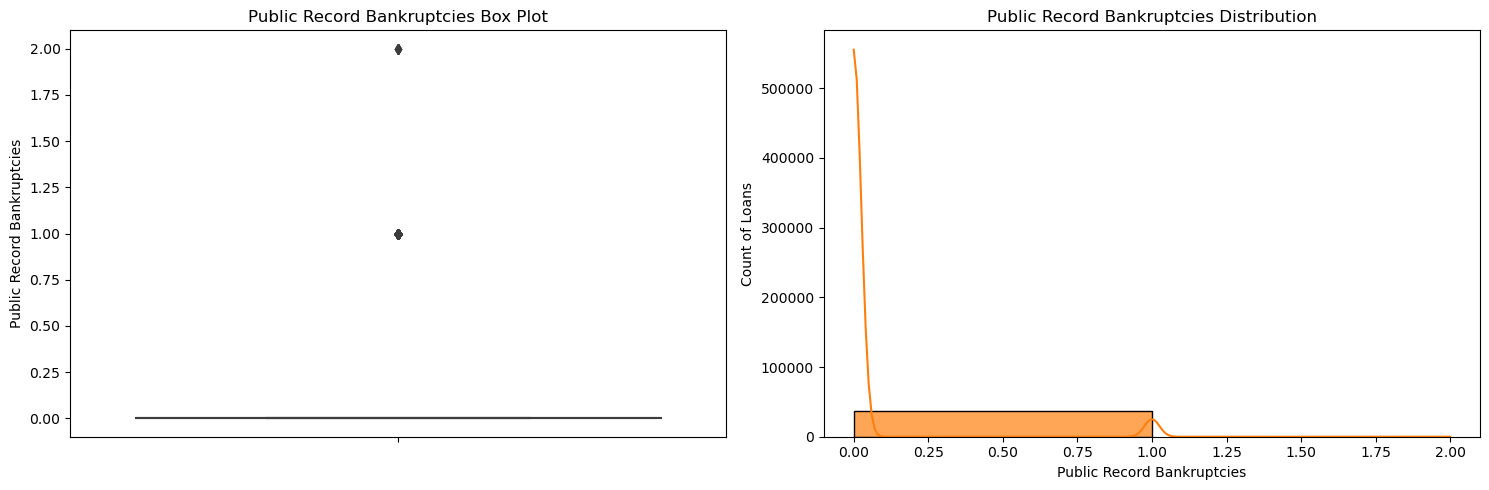

In [221]:
fx, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(y='pub_rec_bankruptcies', data=loan, color=colors[2] ,ax=axes[0])
sns.histplot(loan['pub_rec_bankruptcies'], bins=range(0, 2, 1), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
axes[0].set_title('Public Record Bankruptcies Box Plot')
axes[1].set_title('Public Record Bankruptcies Distribution')
axes[1].set_xlabel('Public Record Bankruptcies')
axes[1].set_ylabel('Count of Loans')
axes[0].set_ylabel('Public Record Bankruptcies')
plt.tight_layout()
plt.show()

**Inference**: Public record bankrupties are 0 more than 90%. Not doing any outlier removal here. This might not have significant impact on loan payment as much as it sounds.

#### Inference from Numerical Analysis without Considering Loan Status

These fields presented interesting distribution of data (Only Numerical fields were considered) - **Loan Amount,  Annual Income, Interest Rate.**

1 - Around 14% of Loan is Charged off
2 - Most of borrowers income ranges between $40k-80K
3 - Most of the loan amount ranges between $5K-15K
4 - Interest Rate ranges between 10-15% for most of the loans
5 - Installment amount is generally between $200 -$400
6 - DTI for most of borrowers are in the range of 10-18%

### Category Variable Univariate Analysis/Segmented Analysis ###
Home ownership, Grade and Sub Grade, Employement Length, Term, Purpose, Credit History


Home Ownership

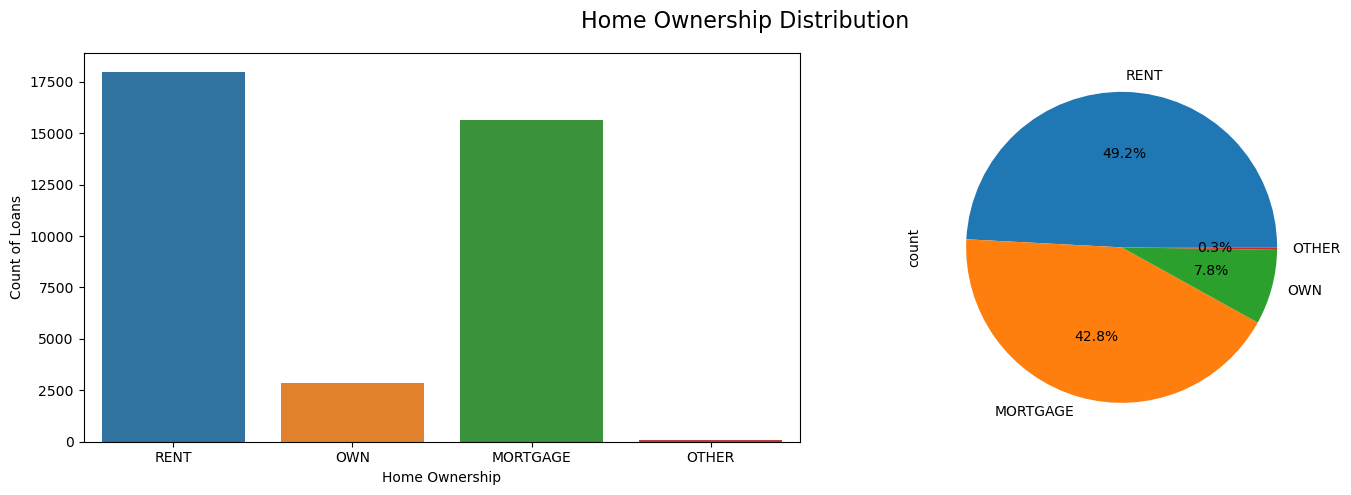

In [222]:
# As home ownership has value none.. lets find its count. Only 3 rows have none as home ownership. we can make it as Other. 

loan['home_ownership'].value_counts()
loan.loc[loan['home_ownership'] == 'NONE', 'home_ownership'] = 'OTHER'


# Home ownership distribution using countplot and pie chart using seaborn and subplot


fx, axes = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Home Ownership Distribution', fontsize=16)
sns.countplot(x='home_ownership', data=loan, ax=axes[0])
loan['home_ownership'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[0].set_xlabel('Home Ownership')
axes[0].set_ylabel('Count of Loans')
plt.tight_layout()
plt.show()


***Inference*** : Very less people who has own home has taken loan. Most of the people who has taken loan are staying in rented house or mortgaged house.

#### Purpose

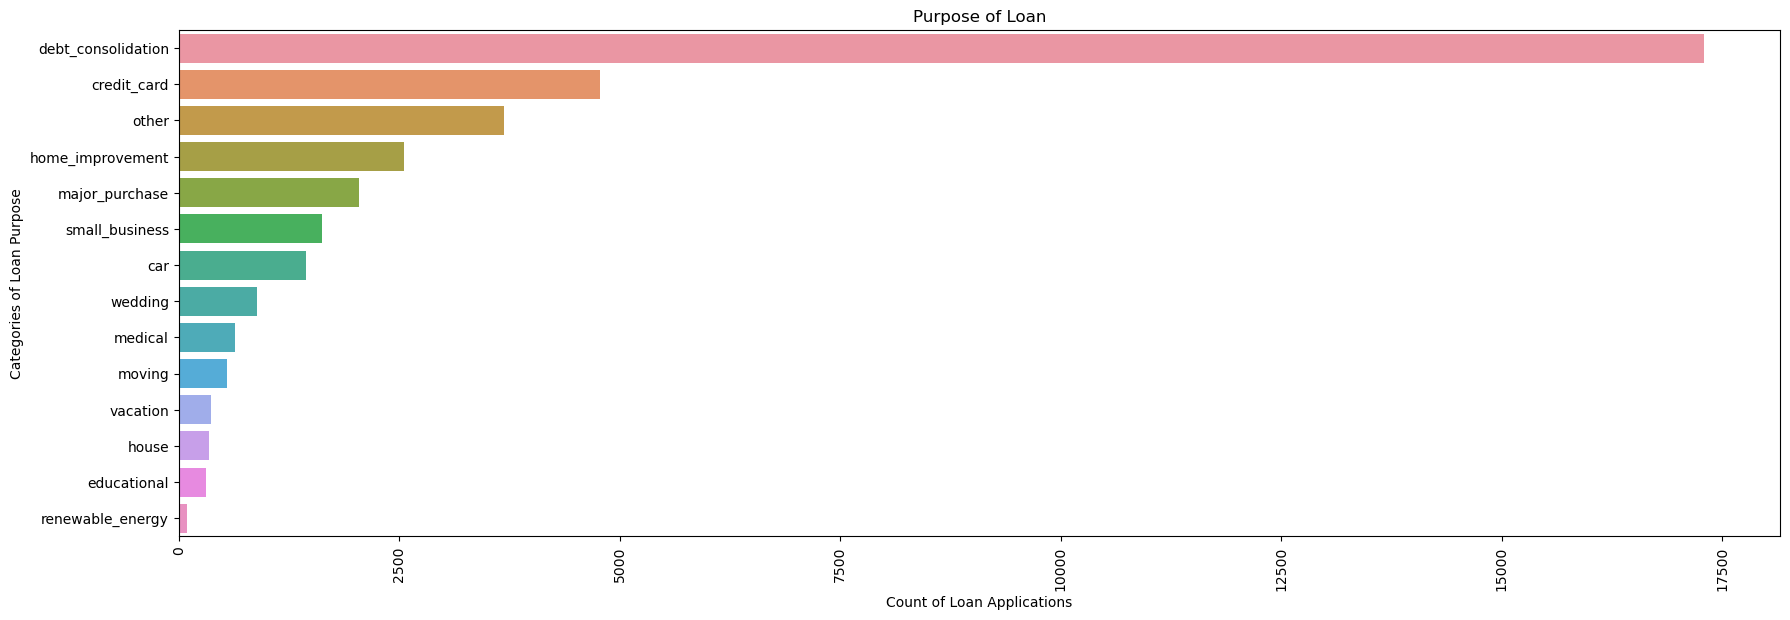

In [223]:

plt.figure(figsize=(18,6))
sns.countplot(y='purpose', data=loan, order=loan['purpose'].value_counts().index)
plt.xlabel('Count of Loan Applications')
plt.ylabel('Categories of Loan Purpose')
plt.title('Purpose of Loan')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()



***Inference***: Debt consolidation is biggest reason for loan

#### Analyse grade and subgrade 

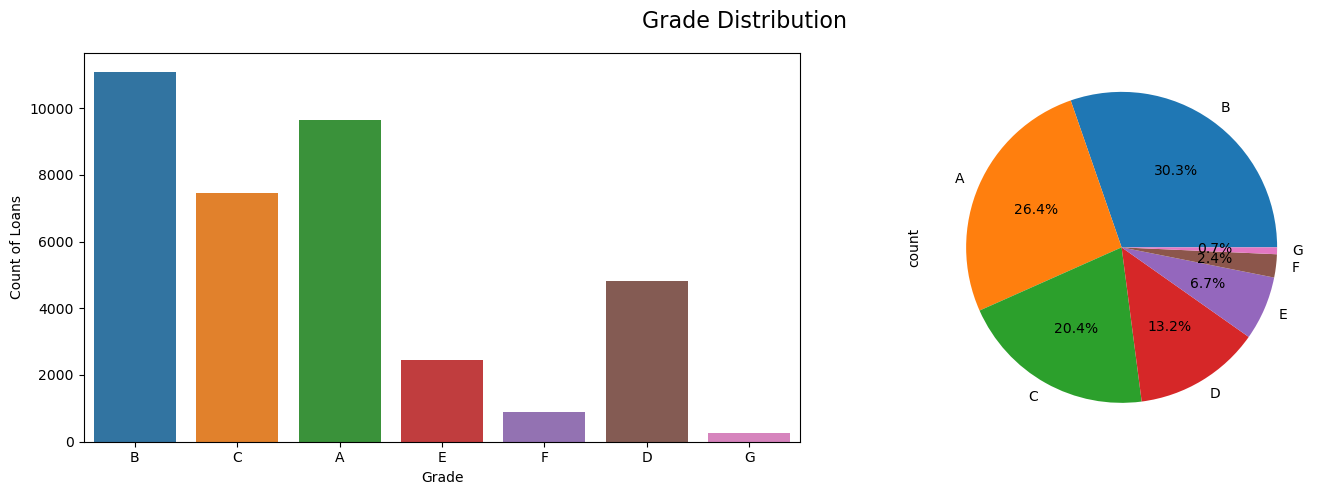

In [224]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Grade Distribution', fontsize=16)
sns.countplot(x='grade', data=loan, ax=axes[0])
loan['grade'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Count of Loans')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Sub Grade Distribution within Grade')

<Figure size 1800x600 with 0 Axes>

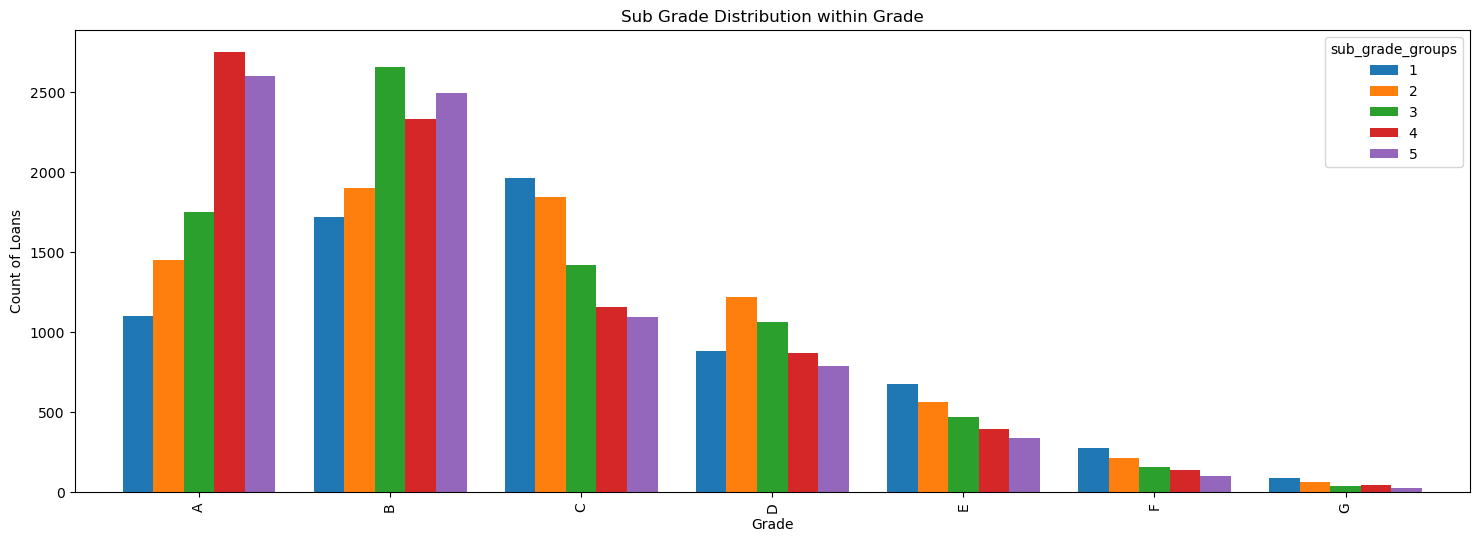

In [225]:
#Analyse Subgrade distribution with in Grade

#Create Sub Grade groups for simpler visualization

plt.figure(figsize=(18,6))
grade_grouped_loan = loan.groupby(['grade', 'sub_grade_groups']).size().unstack()

grade_grouped_loan.plot(kind='bar', stacked=False, figsize=(18,6), width=0.8 )
plt.xlabel('Grade')
plt.ylabel('Count of Loans')
plt.title('Sub Grade Distribution within Grade')


#### Employment Duration

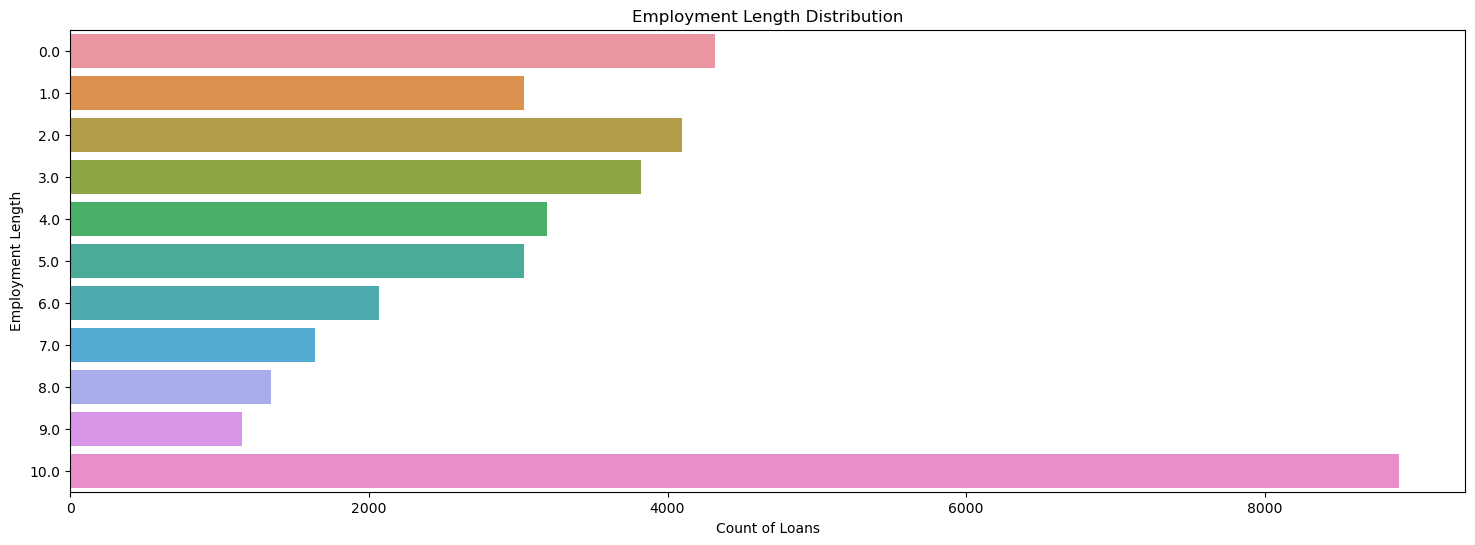

In [226]:
# Employmnet length distribution using countplot and Histogram using seaborn and subplot

# add common title for both the plots

#split data by emp_length and find the count of each

plt.figure(figsize=(18,6))
sns.countplot(y='emp_length', data=loan)
plt.xlabel('Count of Loans')
plt.ylabel('Employment Length')
plt.title('Employment Length Distribution')
plt.show()

Inference: ***Most of the applicants have 10+ years of employment history, clould be planning to buy a house or car or for other purposes.***

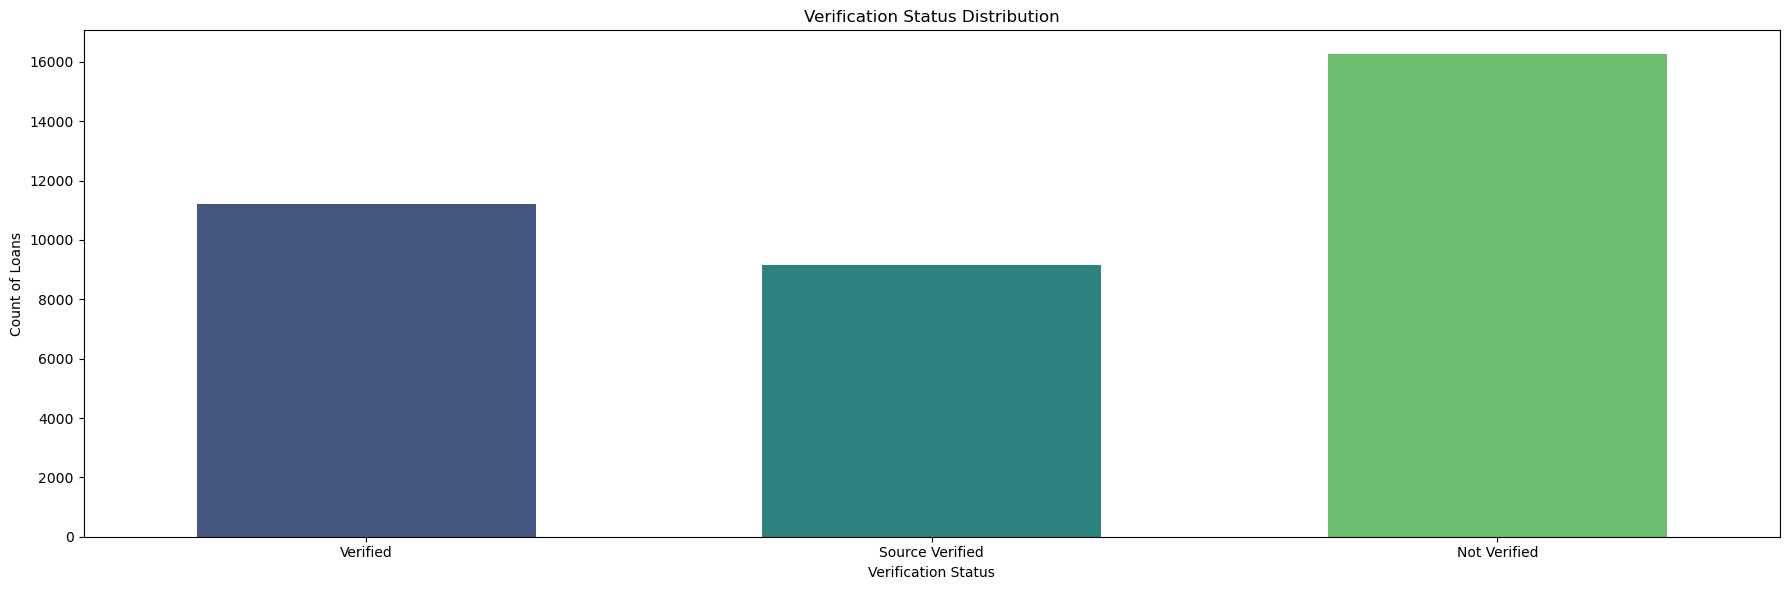

In [227]:
# Anayse with Verification Status

plt.figure(figsize=(18,6))
sns.countplot(x='verification_status', data=loan, width=0.6, palette='viridis')
plt.title('Verification Status Distribution')
plt.xlabel('Verification Status')
plt.ylabel('Count of Loans')
plt.tight_layout()
plt.show()

**Inference**: 50% of Loans are not Verified

### Inference for Segmented Analysis

1 - Most of the loans are taken by employees with 10+ years of Experience
2 - People who do not own an independent house tend to take loans
3 -  Most of the loans are availed by people with Credit Grade A&B, there is lesser risk with better credit grade 
4 - **Debt Consolidation** is the biggest reason for Loan

Variables that presented patterns were **Employement Duration, Grade, Purpose**. We present different view for House Ownership, People owning independent house might not for loan. Will this variable provide some more insights we need to identify during, by categorizing defualters data and performing Bi Variate analysis


## Analyse Deafulters data. Find possible reasons for defaulting
Identify what variables present these information

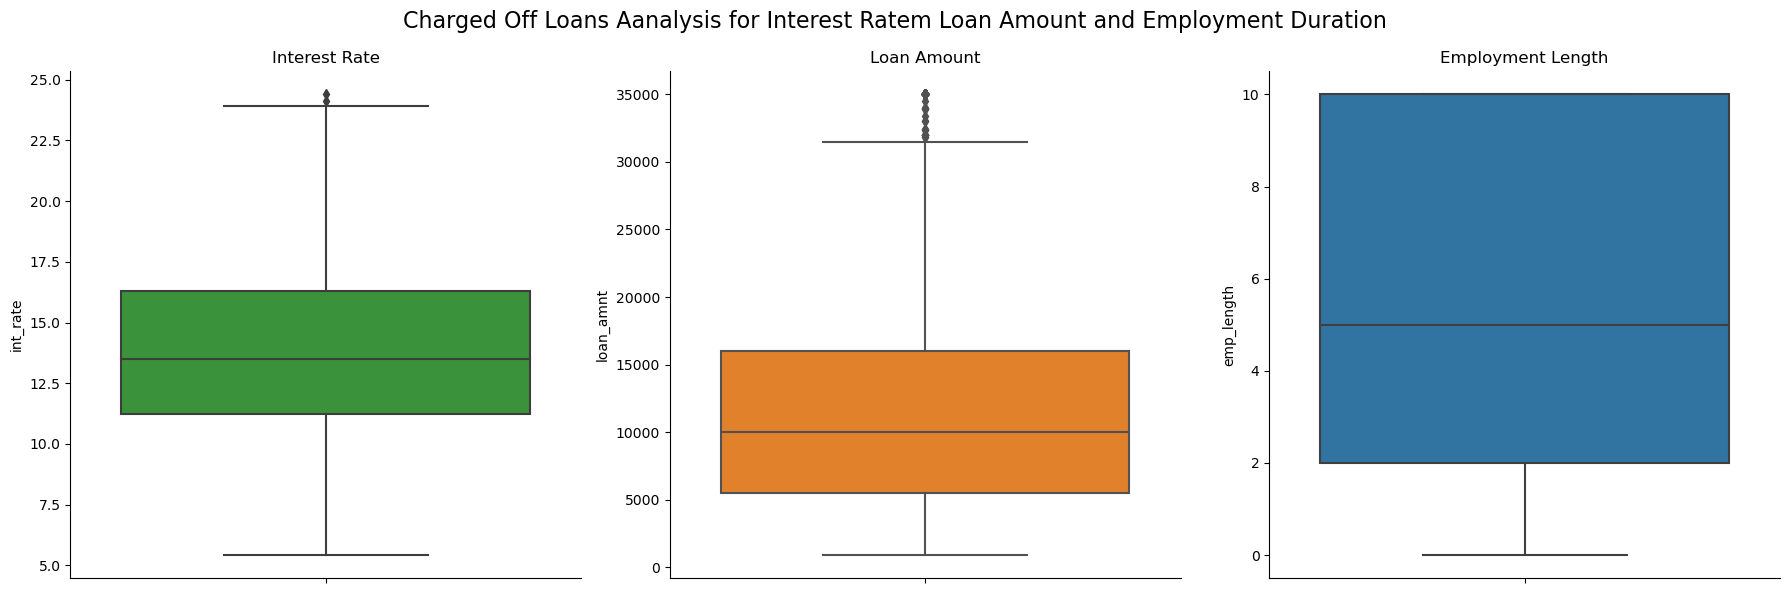

In [228]:
# Bot plot Interest rate and loan amount for charged off loans and employement length in a single plot


loan_def = loan[loan.loan_status == 'Charged Off']
fig, axes = plt.subplots(1,3, figsize=(18,6))

sns.boxplot(y='int_rate', data=loan_def, ax=axes[0], color=colors[2])
sns.boxplot(y='loan_amnt', data=loan_def, ax=axes[1], color=colors[1])
sns.boxplot(y='emp_length', data=loan_def, ax=axes[2], color=colors[0])
axes[0].set_title('Interest Rate')
axes[1].set_title('Loan Amount')
axes[2].set_title('Employment Length')
plt.suptitle('Charged Off Loans Aanalysis for Interest Ratem Loan Amount and Employment Duration', fontsize=16)
sns.despine()
plt.tight_layout()
plt.show()

**Inference**: With the defaulters data, it is observed that median of the interest rate is ~14% with smaller loans of $10K and emp experience of ~5 Years. Median Value is considered here.

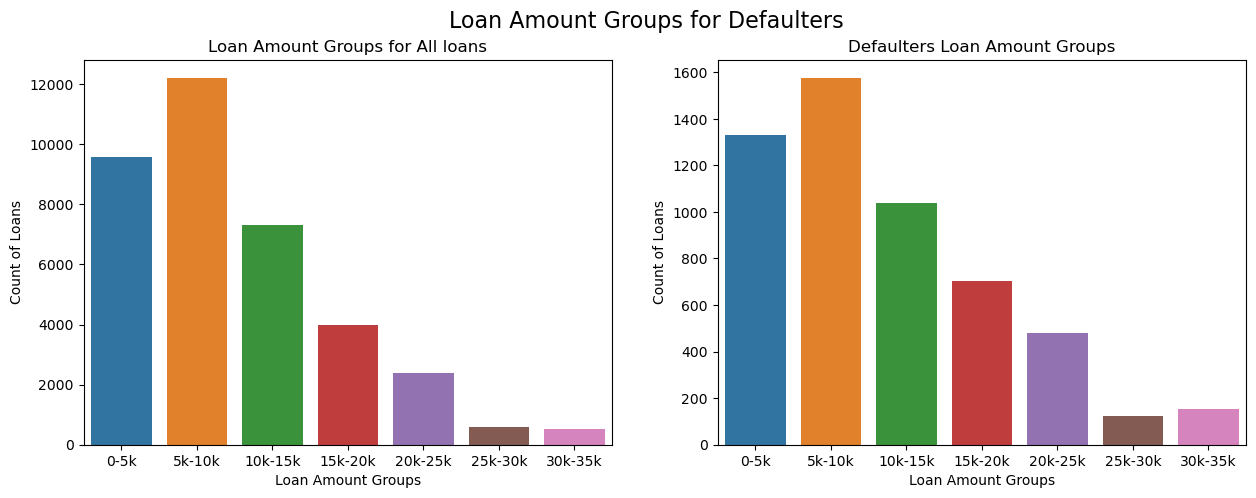

In [229]:
#Analyse the loan amount groups for Defaulters

fig, axes = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Loan Amount Groups for Defaulters', fontsize=16)
sns.countplot(x='loan_amnt_groups', data=loan_def, ax=axes[1])
sns.countplot(x='loan_amnt_groups', data=loan, ax=axes[0])
axes[1].set_title('Defaulters Loan Amount Groups')  
axes[0].set_title('Loan Amount Groups for All loans')
axes[1].set_xlabel('Loan Amount Groups')
axes[1].set_ylabel('Count of Loans')
axes[0].set_xlabel('Loan Amount Groups')
axes[0].set_ylabel('Count of Loans')
plt.show()



In [230]:
loan['annual_inc_groups'].value_counts()

annual_inc_groups
40k-80k      14335
80k-120k     10768
0-40k         4850
120k-160k     4463
160k-200k     2190
Name: count, dtype: int64

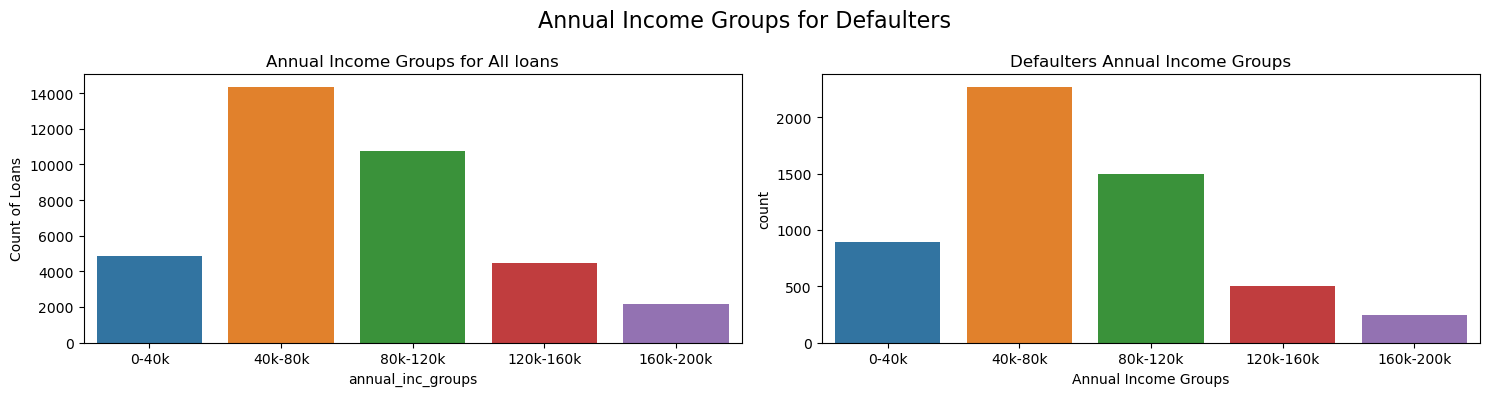

In [231]:
#Analyse Annual Income groups for Defaulters vs All loans

fig, axes = plt.subplots(1,2, figsize=(15,4))
plt.suptitle('Annual Income Groups for Defaulters', fontsize=16)
sns.countplot(x='annual_inc_groups', data=loan_def, ax=axes[1])
sns.countplot(x='annual_inc_groups', data=loan, ax=axes[0])
axes[1].set_title('Defaulters Annual Income Groups')
axes[0].set_title('Annual Income Groups for All loans')
axes[1].set_xlabel('Annual Income Groups')
axes[0].set_ylabel('Count of Loans')
axes[1].set_xlabel('Annual Income Groups')
axes[0].set_ylabel('Count of Loans')
plt.tight_layout()
plt.show()

<Figure size 1800x600 with 0 Axes>

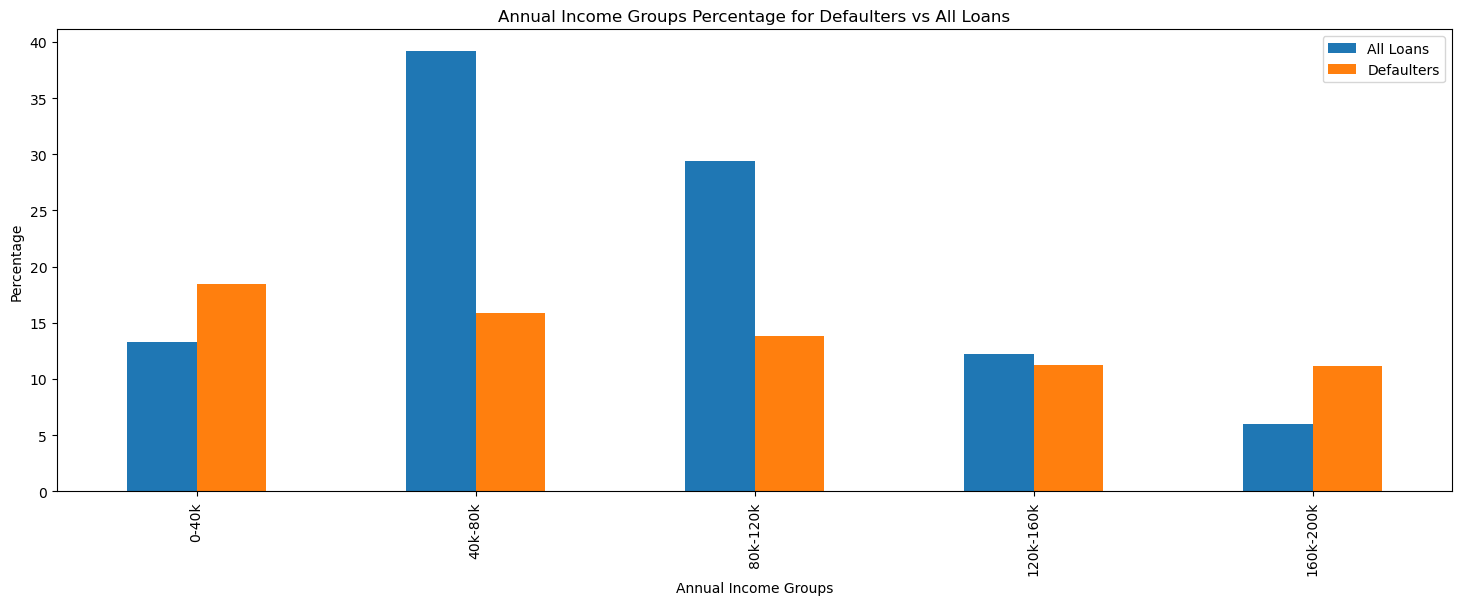

In [232]:
#compare annual income group percentage for defaulters and all loans

ai_def = round(loan_def['annual_inc_groups'].value_counts()/loan['annual_inc_groups'].value_counts()*100,2)
ai_all = round(loan['annual_inc_groups'].value_counts(normalize=True).sort_index()*100,2)

ai_all = pd.merge(ai_all, ai_def, left_index=True, right_index=True)
ai_all.columns = ['All Loans', 'Defaulters']

plt.figure(figsize=(18,6))
ai_all.plot(kind='bar', figsize=(18,6))
plt.title('Annual Income Groups Percentage for Defaulters vs All Loans')
plt.xlabel('Annual Income Groups')
plt.ylabel('Percentage')
plt.show()





**Inference**: As the Annual Income range increases, the defaulters decreases.

In [233]:
loan_def['loan_amnt_groups'].value_counts(normalize=True)*100

loan_amnt_groups
5k-10k     29.155868
0-5k       24.601999
10k-15k    19.196594
15k-20k    12.995187
20k-25k     8.922621
30k-35k     2.850796
25k-30k     2.276934
Name: proportion, dtype: float64

In [234]:
print(loan_def['loan_amnt_groups'].value_counts()/loan['loan_amnt_groups'].value_counts()*100)

loan_amnt_groups
0-5k       13.865415
5k-10k     12.905605
10k-15k    14.153132
15k-20k    17.664821
20k-25k    20.091705
25k-30k    21.280277
30k-35k    28.571429
Name: count, dtype: float64


In [235]:
loan['loan_amnt_groups'].value_counts()

loan_amnt_groups
5k-10k     12204
0-5k        9585
10k-15k     7327
15k-20k     3974
20k-25k     2399
25k-30k      578
30k-35k      539
Name: count, dtype: int64

<Figure size 1800x600 with 0 Axes>

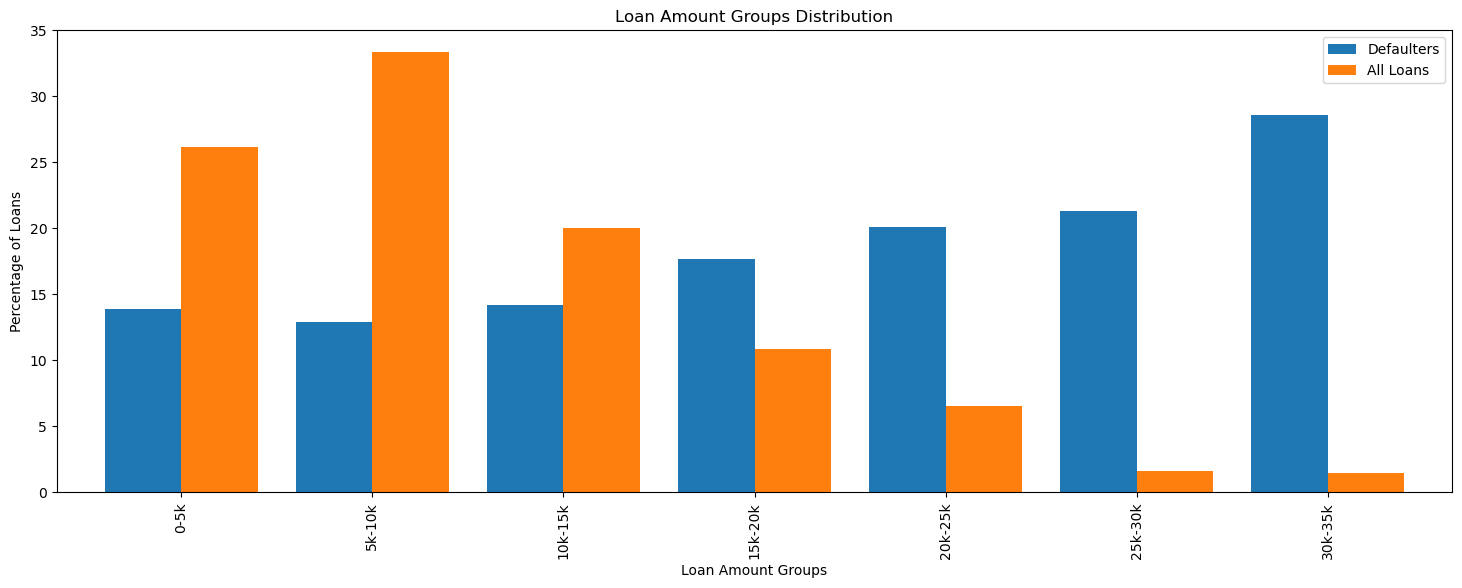

In [236]:
#compare loan amount group percentage for defaulters and all loans. Here for defaulters, what has been done is take the loan group from defaulters and divide it by all loans group to get the percentage of defaulters in each loan group
#the aim is to understand how much percentage of defaulters are there in each loan group

plt.figure(figsize=(18,6))

def_percentage = round(loan_def['loan_amnt_groups'].value_counts()/loan['loan_amnt_groups'].value_counts()*100,2)
loan_percentage = round(loan['loan_amnt_groups'].value_counts()/len(loan)*100,2)

allloan_percentage = pd.merge(def_percentage, loan_percentage, left_index=True, right_index=True)

allloan_percentage.columns = ['Defaulters', 'All Loans']

allloan_percentage.plot(kind='bar', figsize=(18,6), width=0.8)
plt.xlabel('Loan Amount Groups')
plt.ylabel('Percentage of Loans')
plt.title('Loan Amount Groups Distribution')
plt.show()


**Inference**: Although highest defaulters count is in range below 15K, Percentage of defaulters increases with loan amount. Loan Amount is an important Varaible for analysis.

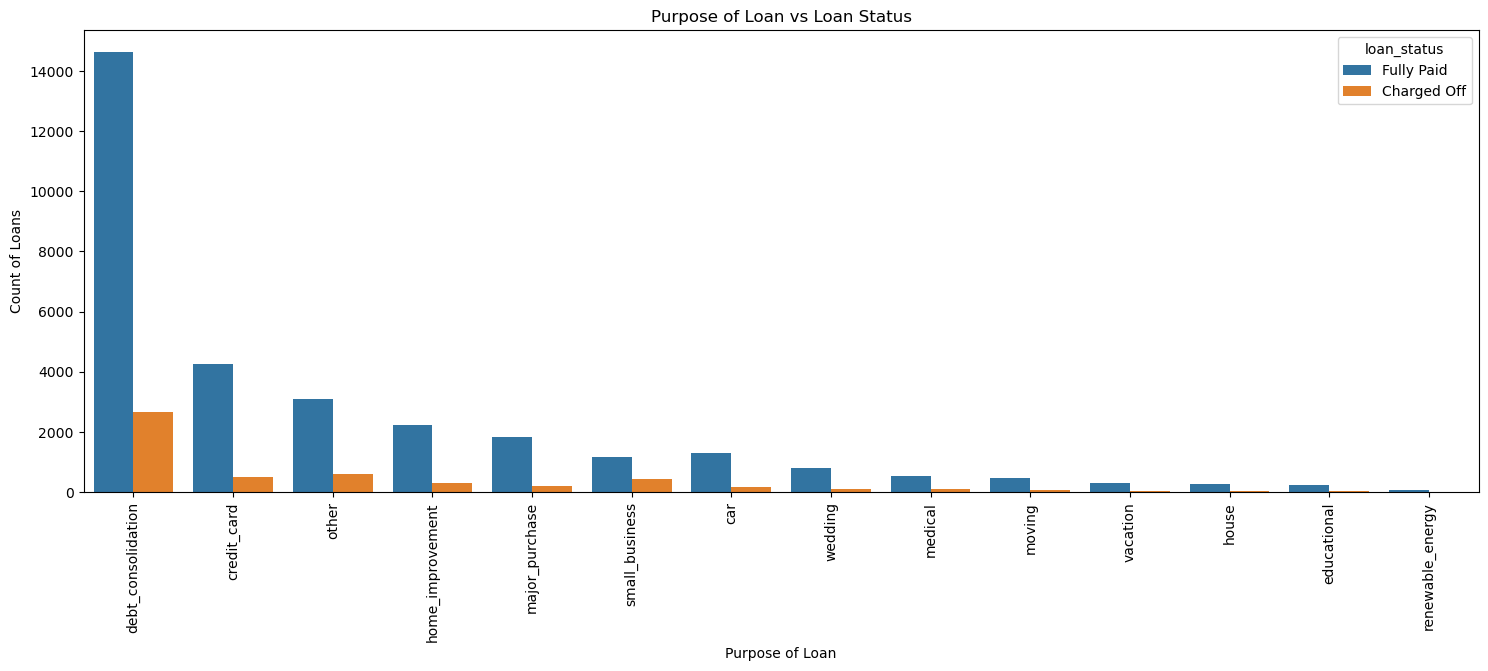

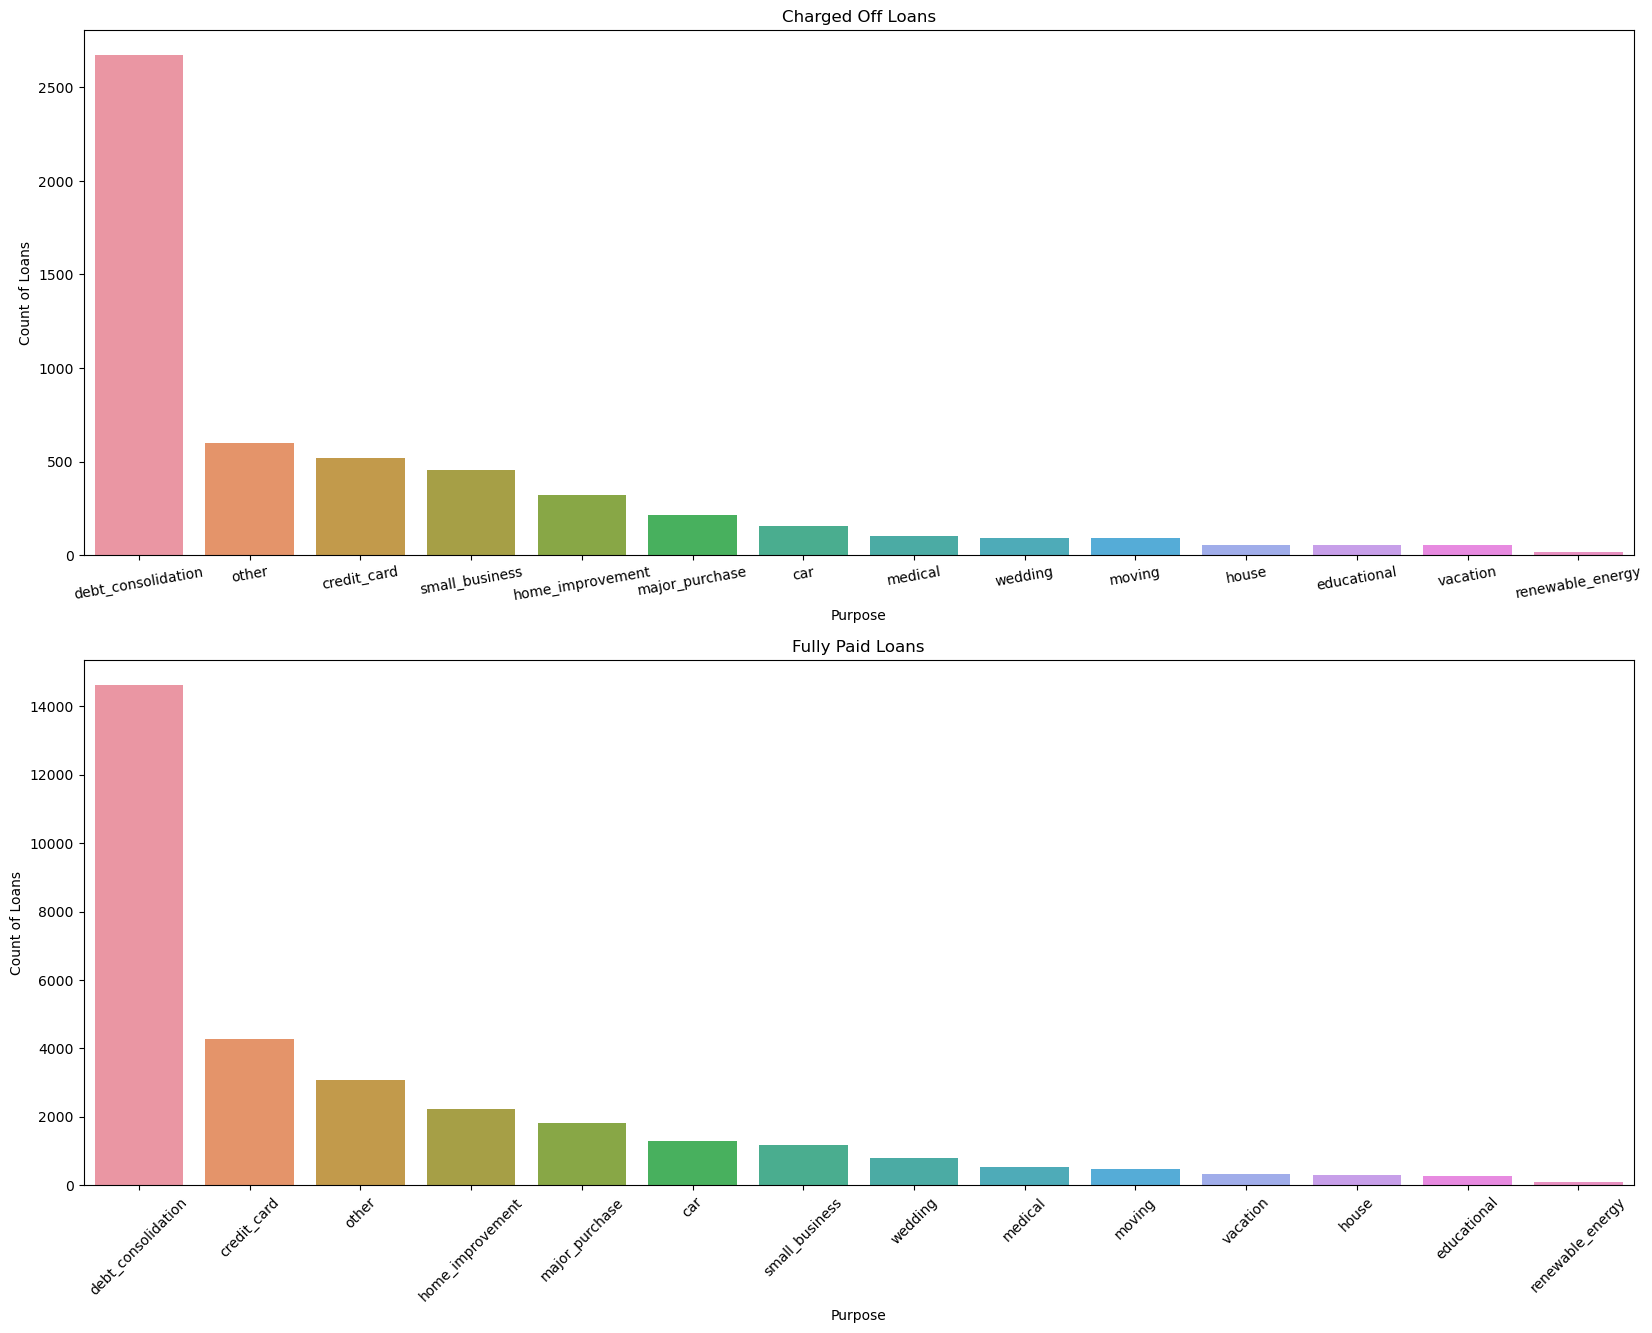

In [237]:

#bar chart of Loan status vs Purpose of loan

plt.figure(figsize=(18,6))
sns.countplot(x='purpose', data=loan, hue='loan_status', order=loan['purpose'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of Loans')
plt.title('Purpose of Loan vs Loan Status')
plt.show()

fig, ax = plt.subplots(2,1, figsize=(20,15))
sns.countplot(x='purpose', data=loan[loan.loan_status =='Fully Paid'], ax=ax[1], order=loan[loan.loan_status =='Fully Paid']['purpose'].value_counts().index)
sns.countplot(x='purpose', data=loan_def, ax=ax[0], order=loan_def['purpose'].value_counts().index)
ax[0].set_title('Charged Off Loans')
ax[1].set_title('Fully Paid Loans')
ax[0].set_xlabel('Purpose')
ax[1].set_xlabel('Purpose')
ax[0].set_ylabel('Count of Loans')
ax[1].set_ylabel('Count of Loans')
ax[0].xaxis.set_tick_params(rotation=10)
ax[1].xaxis.set_tick_params(rotation=45)
plt.show()



***Inference***: Debt consolidation has highest percentage of defaulters, People would have taken loan & clearing that would have been challenge, followed by Credit Card, Other and Small Business


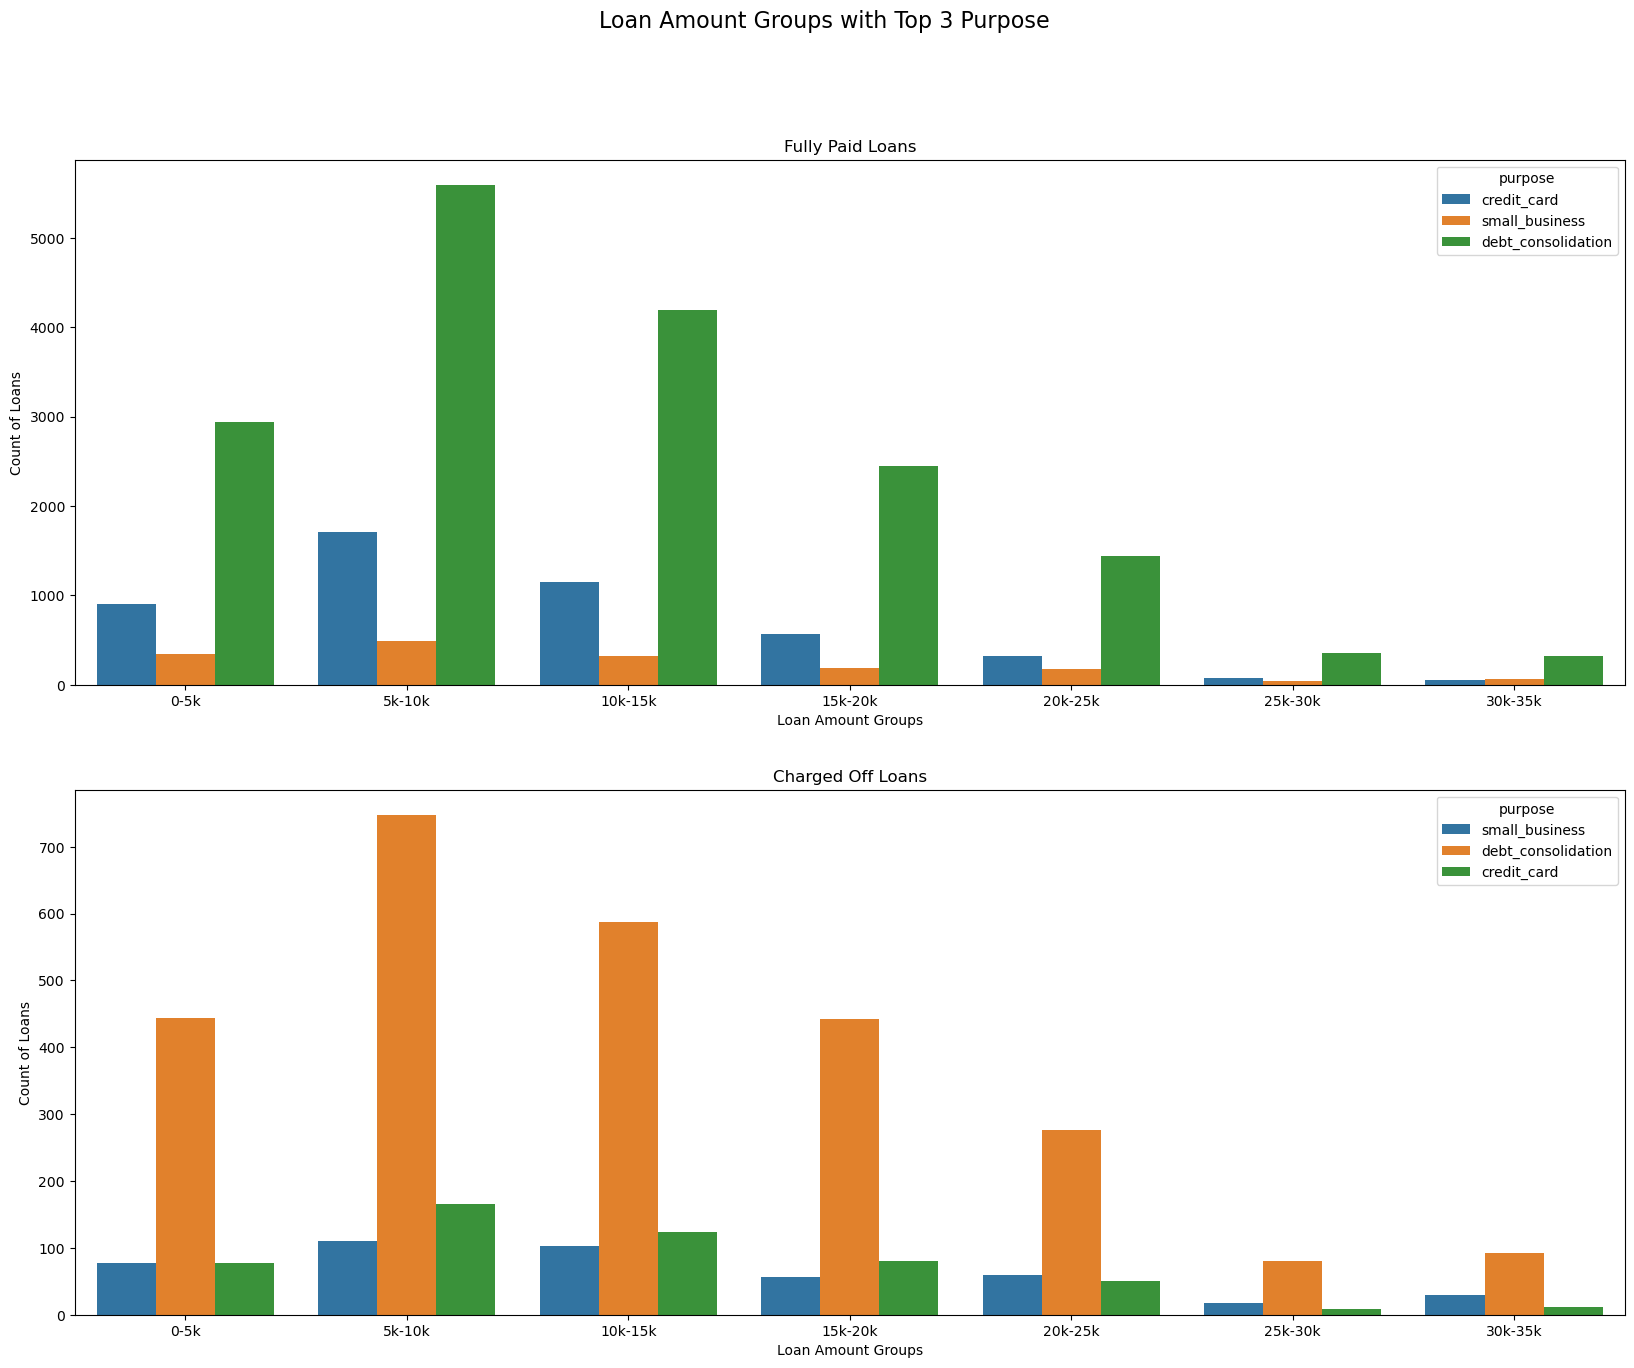

In [238]:
# plot loan group vs purpose of loan using bar chart. Compare fully paid loans vs Charged off loans

fig, ax = plt.subplots(2,1, figsize=(20,15))
sns.countplot(x='loan_amnt_groups', data=loan[(loan.purpose =='credit_card') | (loan.purpose =='debt_consolidation') | (loan.purpose =='small_business')], hue='purpose', ax=ax[0])
sns.countplot(x='loan_amnt_groups', data=loan_def[(loan_def.purpose =='credit_card') | (loan_def.purpose =='debt_consolidation') | (loan_def.purpose =='small_business')], hue='purpose', ax=ax[1])
ax[0].set_title('Fully Paid Loans')
ax[1].set_title('Charged Off Loans')
ax[0].set_xlabel('Loan Amount Groups')
ax[1].set_xlabel('Loan Amount Groups')
ax[0].set_ylabel('Count of Loans')
ax[1].set_ylabel('Count of Loans')
plt.suptitle('Loan Amount Groups with Top 3 Purpose', fontsize=16)
plt.show()


***Inference***: Debt consolidation is a risky loan. Also, Small Business above 25K is risky.

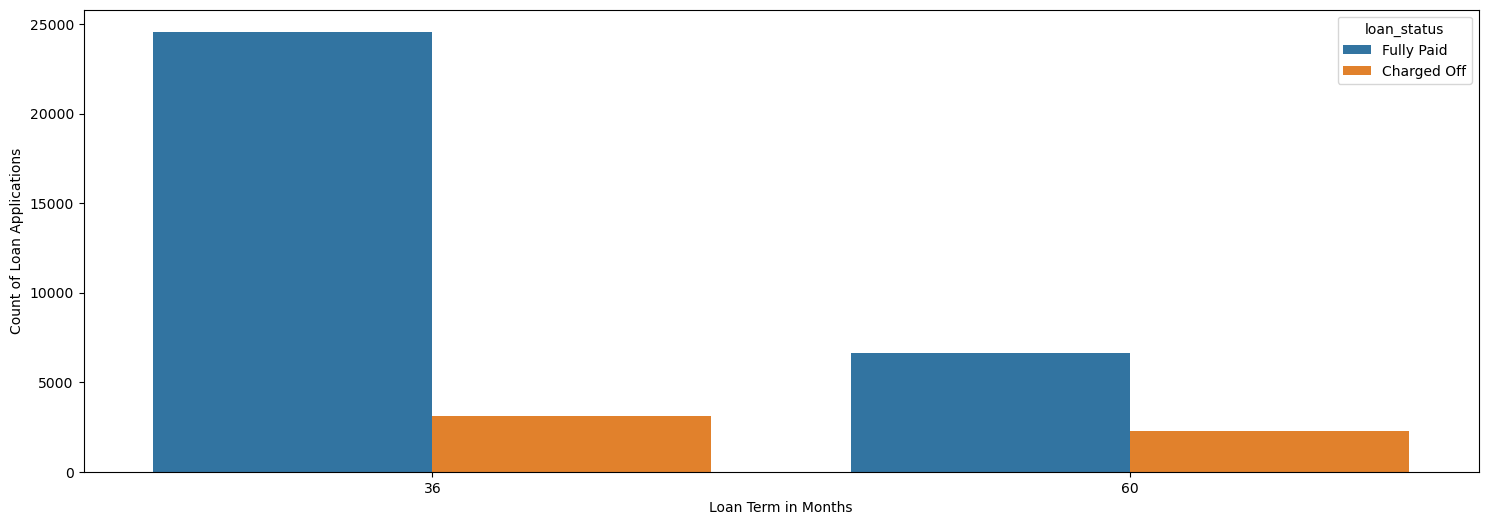

In [239]:
# check the count of defaulters with loan term using countplot 


plt.figure(figsize=(18,6))
sns.countplot(x='term', data=loan, hue='loan_status')
plt.xlabel('Loan Term in Months')
plt.ylabel('Count of Loan Applications')
plt.show()




Inference: **Longer the loan loan term, defaulting chance increases**

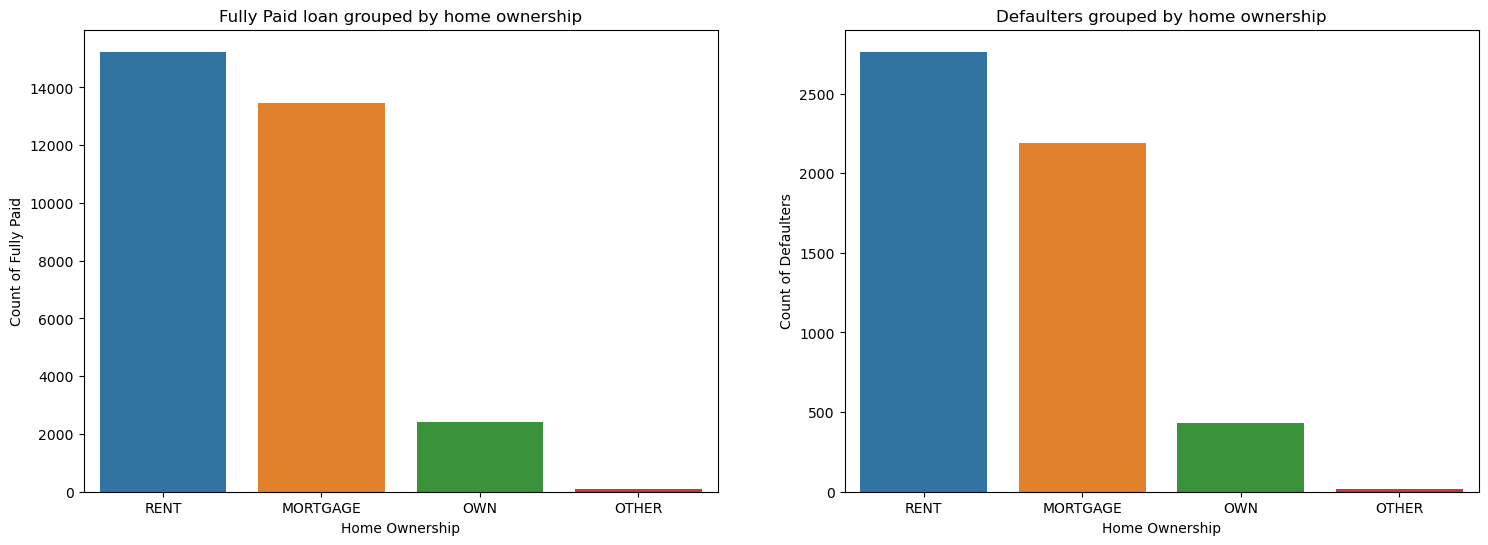

In [240]:
# Defaulters grouped by home ownership

# arrange by Y axis in descending order

fig, ax = plt.subplots(1,2, figsize=(18,6))
sns.countplot(x='home_ownership', data=loan[loan.loan_status !='Fully Paid'], order=loan['home_ownership'].value_counts().index, ax=ax[1])
sns.countplot(x='home_ownership', data=loan[loan.loan_status =='Fully Paid'], order=loan['home_ownership'].value_counts().index, ax=ax[0])
ax[1].set_title('Defaulters grouped by home ownership')
ax[0].set_title('Fully Paid loan grouped by home ownership')
ax[1].set_ylabel('Count of Defaulters')
ax[0].set_ylabel('Count of Fully Paid')
ax[1].set_xlabel('Home Ownership')
ax[0].set_xlabel('Home Ownership')

plt.show()

Inference: **Home ownership has no impact on defaulters or non defaulters**


#### Credit Grade comparison

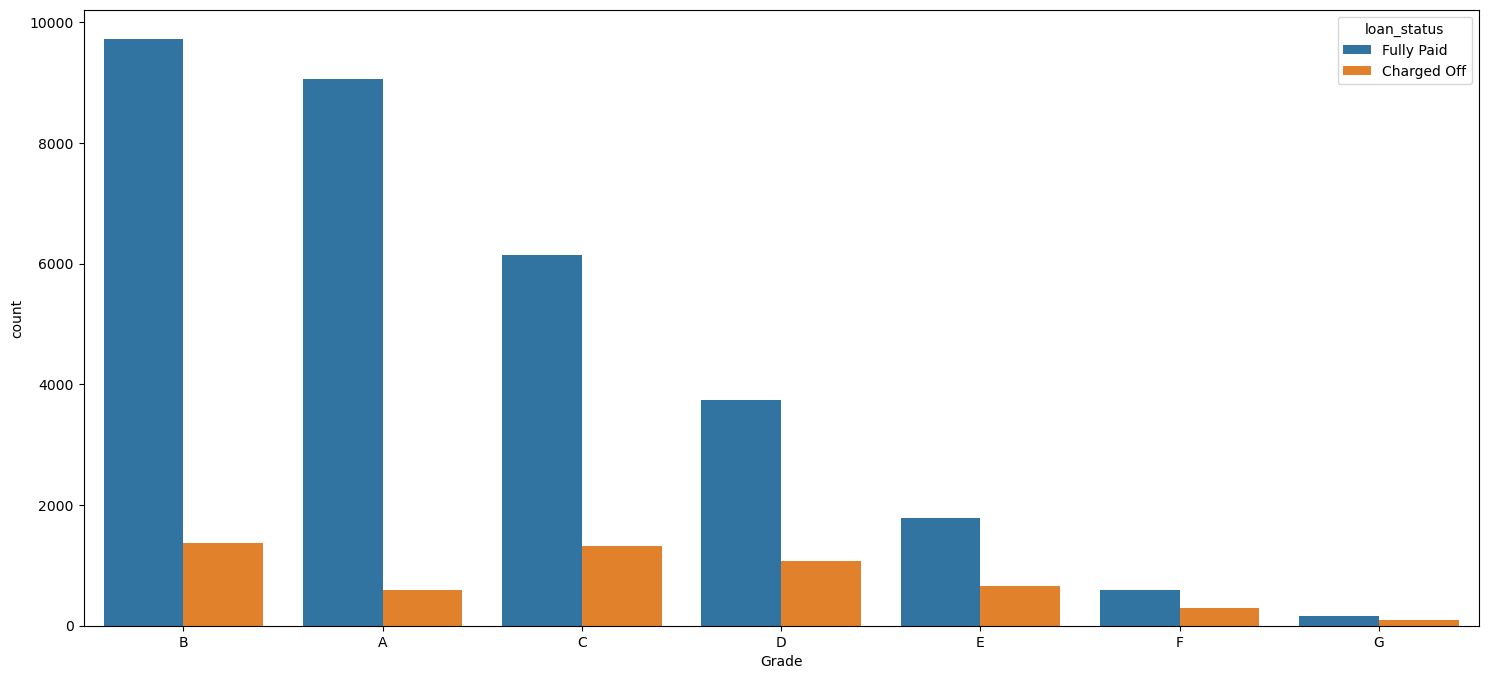

In [241]:
# Split by Grade and Subgrade

plt.figure(figsize=(18,8))
sns.countplot(x='grade', data=loan, hue='loan_status', order=loan['grade'].value_counts().index)
plt.xlabel('Grade')
plt.show()


**Inference**: Defaulter count increases with Grade C and with grade E, F, G it is almost 50% loans are defaulted.

##### Interest Rate Analysis. Compare both loan status

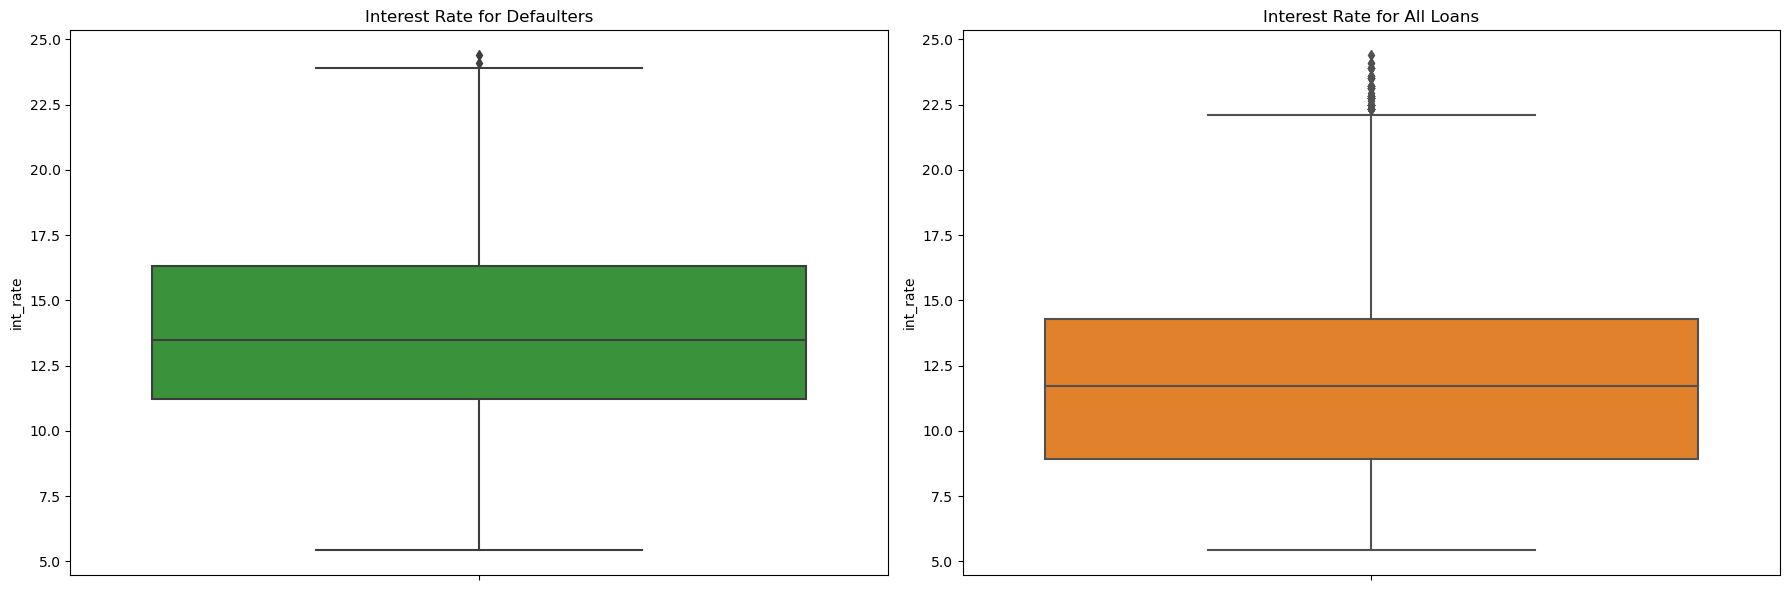

In [242]:
fig,axes = plt.subplots(1,2, figsize=(18,6))
sns.boxplot(y='int_rate', data=loan_def, ax=axes[0], color=colors[2])
sns.boxplot(y='int_rate', data=loan, ax=axes[1], color=colors[1])
axes[0].set_title('Interest Rate for Defaulters')
axes[1].set_title('Interest Rate for All Loans')
plt.tight_layout()
plt.show()

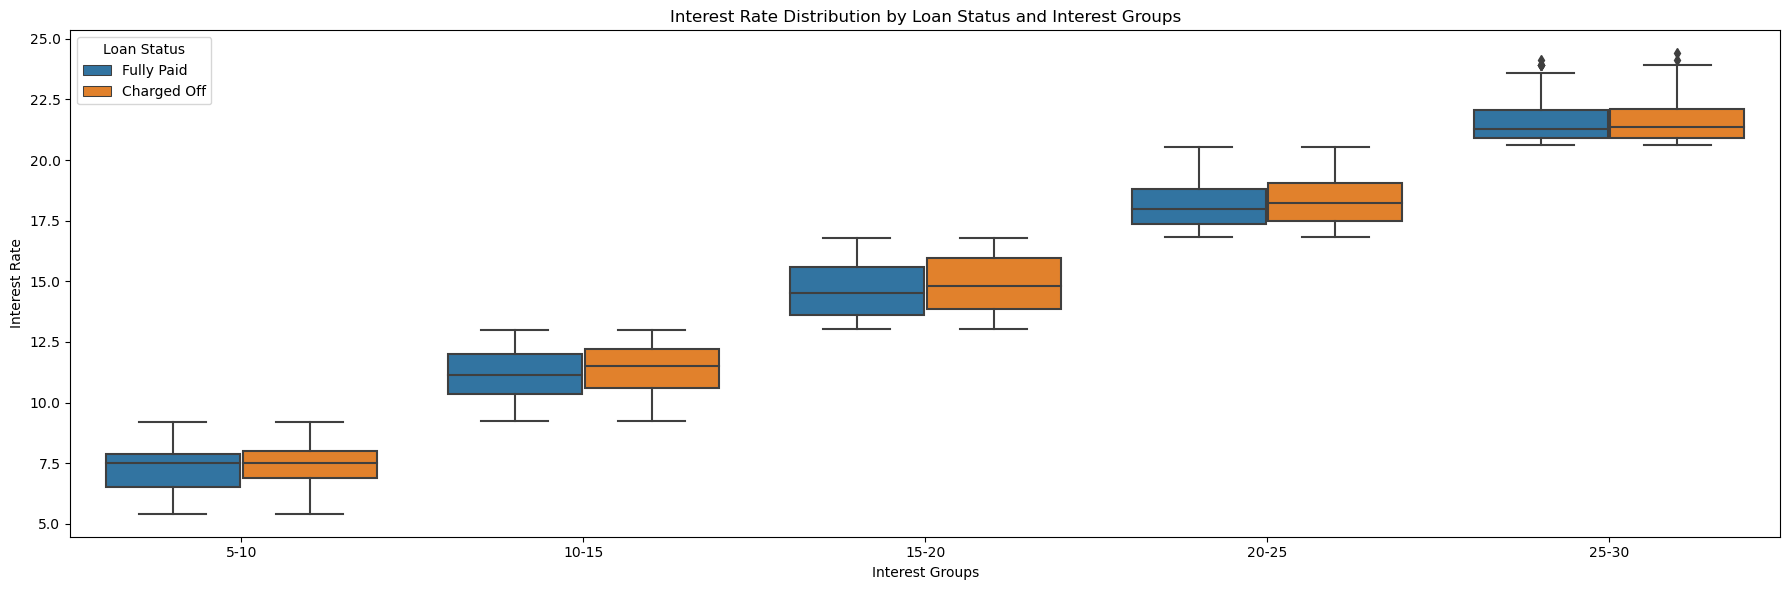

In [243]:
#Box plot interest rate with group by on interest rate group with loan status
plt.figure(figsize=(18, 6))
sns.boxplot(y='int_rate', data=loan, x='interest_groups', hue='loan_status')
plt.title('Interest Rate Distribution by Loan Status and Interest Groups')
plt.xlabel('Interest Groups')
plt.ylabel('Interest Rate')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


# plt.figure(figsize=(18,6))
# sns.boxplot(y='loan_amnt', data=loan[loan.loan_status=='Charged Off'], x='interest_groups')
# sns.boxplot(y='loan_amnt', data=loan[loan.loan_status=='Fully Paid'], x='interest_groups')
# plt.title('Interest Rate Distribution by Loan Status')
# plt.show()

**Inference**: Median value interest of Defaulters is higher than All loans, which shows interest rate impacts loan payment

## Bivariate Analsysis ##

For Bivariaye analyis, numerical variables are analysed first. Then Categorical variables are analysed. The goal here is to identify a pattern/dependency of one variable over other and extract information on Defaulting

**Annual Inc Vs Loan Amount. Scatter plot with hue as loan status**


In [244]:
#find correlation between Annual income and loan amount

loan[['annual_inc', 'loan_amnt']].corr()

,annual_inc,loan_amnt
annual_inc,1.000000,0.402568
loan_amnt,0.402568,1.000000


**Inference**: Loan Amount and Annual income are weakly correlated. Ideally Loan amount should have been based on Annual Income

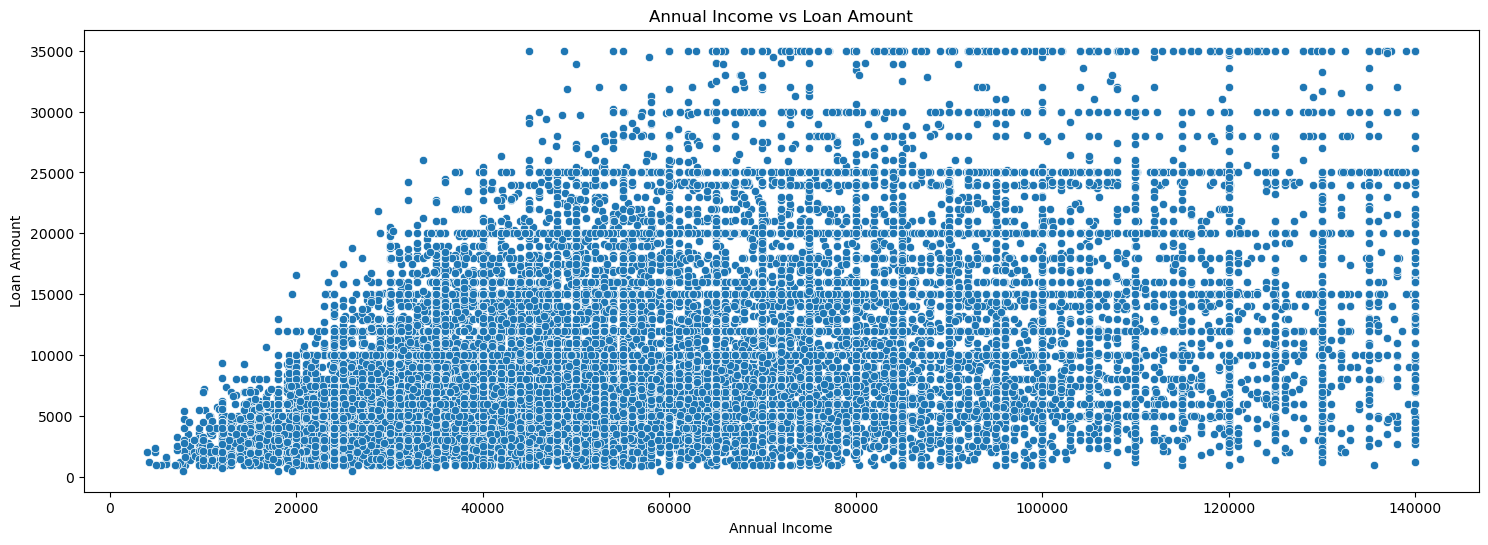

In [245]:
#Annual Inc vs Loan Amount with hue as loan status

plt.figure(figsize=(18,6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan[loan.loan_status =='Fully Paid'])
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Annual Income vs Loan Amount')
plt.show()


In [246]:
# find correlation between Annual income and loan amount

loan[loan['annual_inc'] <20000][['annual_inc', 'loan_amnt']].corr()

,annual_inc,loan_amnt
annual_inc,1.000000,0.333888
loan_amnt,0.333888,1.000000


**Inference**: Annual Income and Loan Amount are weakly correlated. Higher income means defaulting chances are less

##### Find the pattern around defaulting with annual income and loan amount. find which range has more defaulters

<Figure size 1800x600 with 0 Axes>

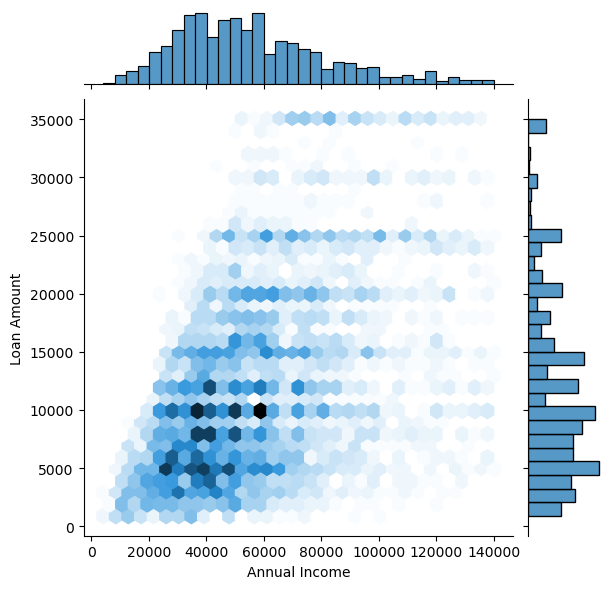

In [247]:
#Hexbin plot for annual income and loan amount for defaulters

plt.figure(figsize=(18,6))
sns.jointplot(x='annual_inc', y='loan_amnt', data=loan_def, kind='hex')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

**Inference**: Most of the loans that are charged off are scattered around ~10K loan amount with Annual income around 20-40K. When loan amount is 1/5th of annual income, possibility of defaulting increases.

##### Analyse top Purpose of Loans with Annual Income to find the behaviour of the borrower

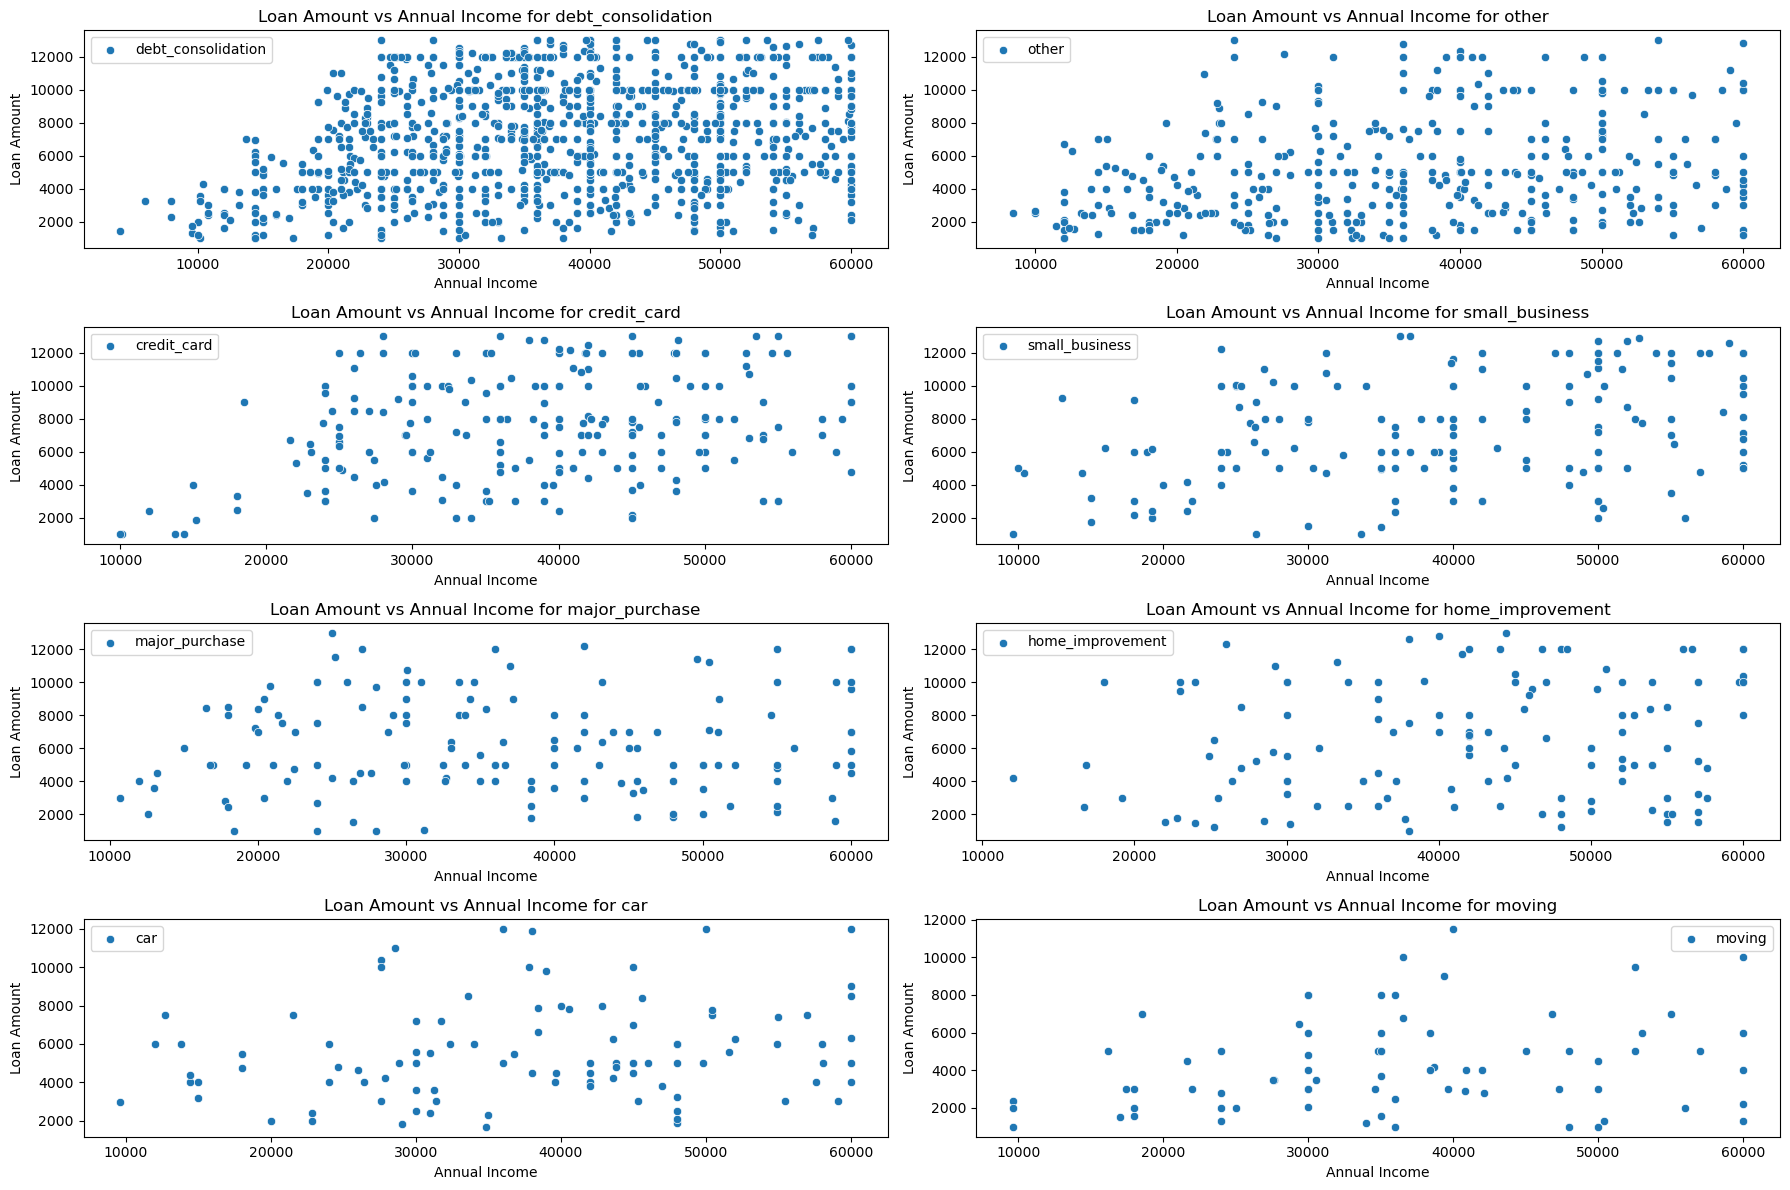

In [248]:
#Analysing further in the loan amount  range and Income range

#loan amount range 0-13000 & annual income range upto 60K

loan_def1 = loan_def[(loan_def['loan_amnt'] <= 13000) & (loan_def['annual_inc'] <= 60000)]

#plotting subplots for loan amount and annual income with purpose of loan

loan_purpose = loan_def1['purpose'].value_counts().index

fig, axes = plt.subplots(4,2, figsize=(18,12))

#using for loop to plot the subplots

for i in range(8):
    purpose = loan_purpose[i]
    sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan_def1[loan_def1['purpose'] == purpose], ax=axes[i//2][i%2], label=purpose)
    axes[i//2][i%2].set_xlabel('Annual Income')
    axes[i//2][i%2].set_ylabel('Loan Amount')
    axes[i//2][i%2].set_title('Loan Amount vs Annual Income for {}'.format(purpose))
plt.tight_layout()
plt.show()





**Inference**: for Debt consolidation defaulters loan amount is spread between 4K-12K in all the Annual Income Ranges. Why they werent able to close the loans is Mystery.


##### Analyse Loan Amount with Interest Rate

In [249]:
print("***Correlation between loan amount and interest rate for defaulters***")
print(loan_def[['loan_amnt', 'int_rate']].corr())
print("\n***Correlation between loan amount and interest rate for all loans***")
print(loan[['loan_amnt', 'int_rate']].corr())

***Correlation between loan amount and interest rate for defaulters***
           loan_amnt  int_rate
loan_amnt    1.00000   0.34136
int_rate     0.34136   1.00000

***Correlation between loan amount and interest rate for all loans***
           loan_amnt  int_rate
loan_amnt   1.000000  0.292707
int_rate    0.292707  1.000000


##### Loan Amount and Interest Rate

<Figure size 1000x500 with 0 Axes>

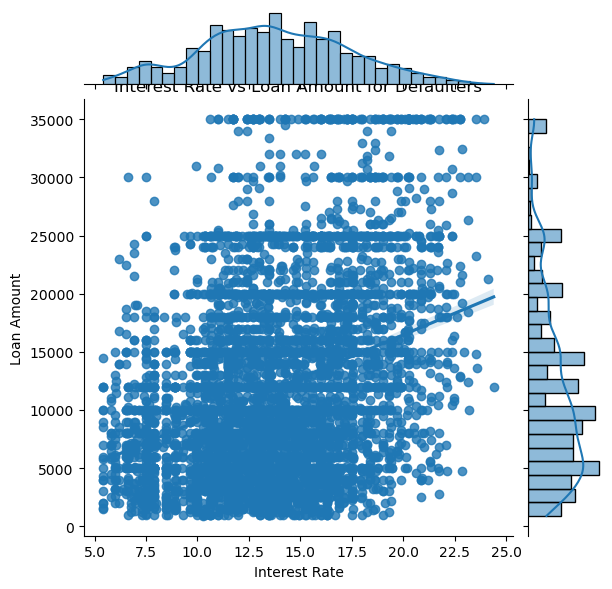

In [250]:
plt.figure(figsize=(10,5))
sns.jointplot(x='int_rate', y='loan_amnt', data=loan_def, kind='reg')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.title('Interest Rate vs Loan Amount for Defaulters')
plt.show()

**Inference**: Even Smaller loans have high interest rate for defulaters. This could be one reason for defaulting

#### Find the pattern of which group of loan has been charged off most.

In [251]:
#group by loan ammount group

loan_g = loan.groupby(['loan_status','loan_amnt_groups'])['loan_amnt_groups'].count()
loan_counts =loan.groupby(['loan_amnt_groups'])['loan_amnt_groups'].count()

In [252]:
loan_g['Charged Off']


loan_amnt_groups
0-5k       1329
5k-10k     1575
10k-15k    1037
15k-20k     702
20k-25k     482
25k-30k     123
30k-35k     154
Name: loan_amnt_groups, dtype: int64

In [253]:
#Find percentage of charged off loans for each loan amount group
charged_off = loan_g['Charged Off']/loan_counts
round(charged_off*100)

loan_amnt_groups
0-5k       14.0
5k-10k     13.0
10k-15k    14.0
15k-20k    18.0
20k-25k    20.0
25k-30k    21.0
30k-35k    29.0
Name: loan_amnt_groups, dtype: float64

In [254]:
charged_off.index

CategoricalIndex(['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k',
                  '30k-35k'],
                 categories=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k'], ordered=True, dtype='category', name='loan_amnt_groups')

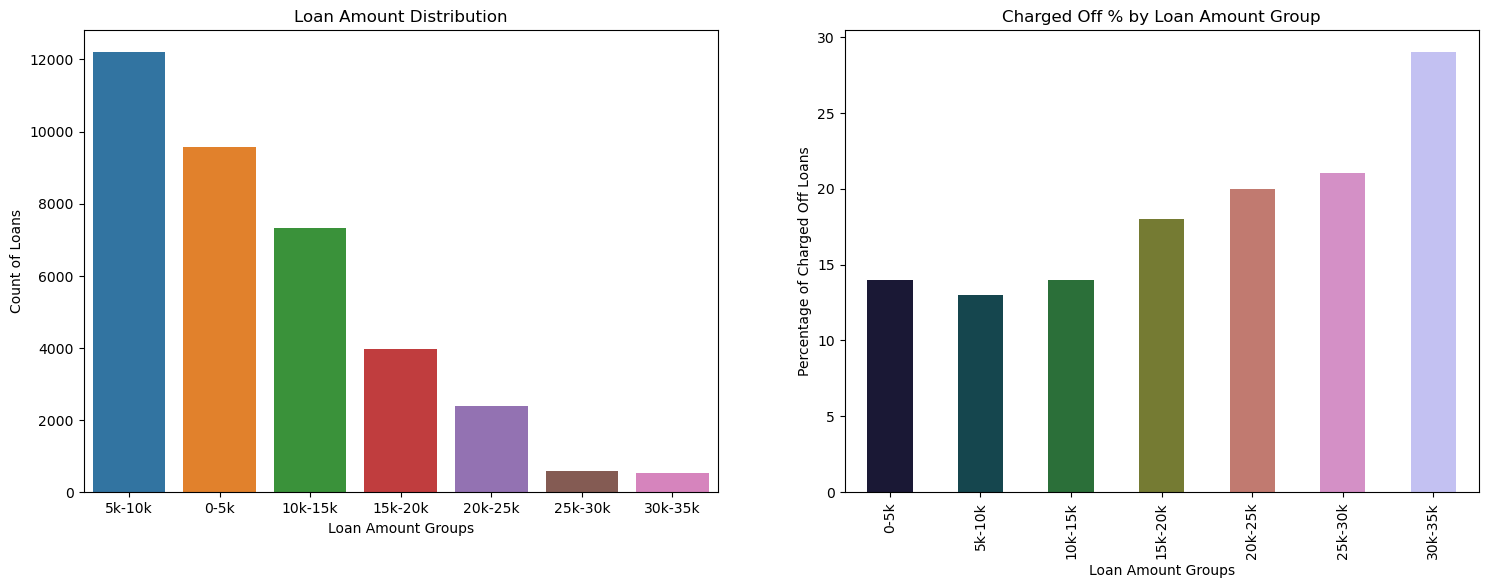

In [255]:
#plotting the bar chart for loan amount group

charged_off = loan_g['Charged Off']/loan_counts

fig,axis = plt.subplots(1,2, figsize=(18,6))

sns.countplot(x='loan_amnt_groups', data=loan, order=loan['loan_amnt_groups'].value_counts().index, ax=axis[0])
round(charged_off*100).plot.bar(color=sns.color_palette('cubehelix', 8))
axis[0].set_title('Loan Amount Distribution')
axis[1].set_title('Charged Off % by Loan Amount Group')
axis[0].set_xlabel('Loan Amount Groups')
axis[0].set_ylabel('Count of Loans')
axis[1].set_xlabel('Loan Amount Groups')
axis[1].set_ylabel('Percentage of Charged Off Loans')

plt.show()

**Inference**:  Loan Granted vs Charged off, when compared to Loan Granted, 30% of Loans are charged off in range 30-35K, when comapred to overall charged off percentage 16%



In [256]:
#loan amount group by loan purpose

loan_g1 = loan.groupby(['loan_status','loan_amnt_groups','purpose'])['loan_amnt_groups'].count()
loan_counts1 =loan.groupby(['loan_amnt_groups','purpose'])['loan_amnt_groups'].count()
loan_g1['Charged Off'].head(10)


loan_amnt_groups  purpose           
0-5k              car                    68
                  credit_card            77
                  debt_consolidation    444
                  educational            22
                  home_improvement       86
                  house                  12
                  major_purchase         84
                  medical                43
                  moving                 58
                  other                 296
Name: loan_amnt_groups, dtype: int64

**For each loan amount group of charged off loans, find the percentage of loan purpose and plot the bar chart**
- Data Setup

In [257]:
#for each loan amount group of charged off loans, find the percentage of loan purpose and plot the bar chart

#Convert Series into a dataframe and reset the index

loan_g2 =pd.DataFrame(loan_g1['Charged Off'])
loan_g2.loc[:,:].loan_amnt_groups =loan_g2.loc[:,:].loan_amnt_groups.astype(int)
loan_g2.rename(columns={'loan_amnt_groups':'count'}, inplace=True)


group_count =loan_g2.groupby('loan_amnt_groups')['count'].sum()

loan_group_list = list(group_count.index)

#assign percentage of loan purpose for each loan amount group

loan_g2['percentage'] = round(loan_g2['count']/group_count.loc[loan_g2.index.get_level_values('loan_amnt_groups')].values*100)
    
loan_g2['percentage'] = loan_g2['percentage'].astype(float)

##### For each loan amount group find the top percentage of loan purpose and plot the bar chart. Only Defaulters data is considered here

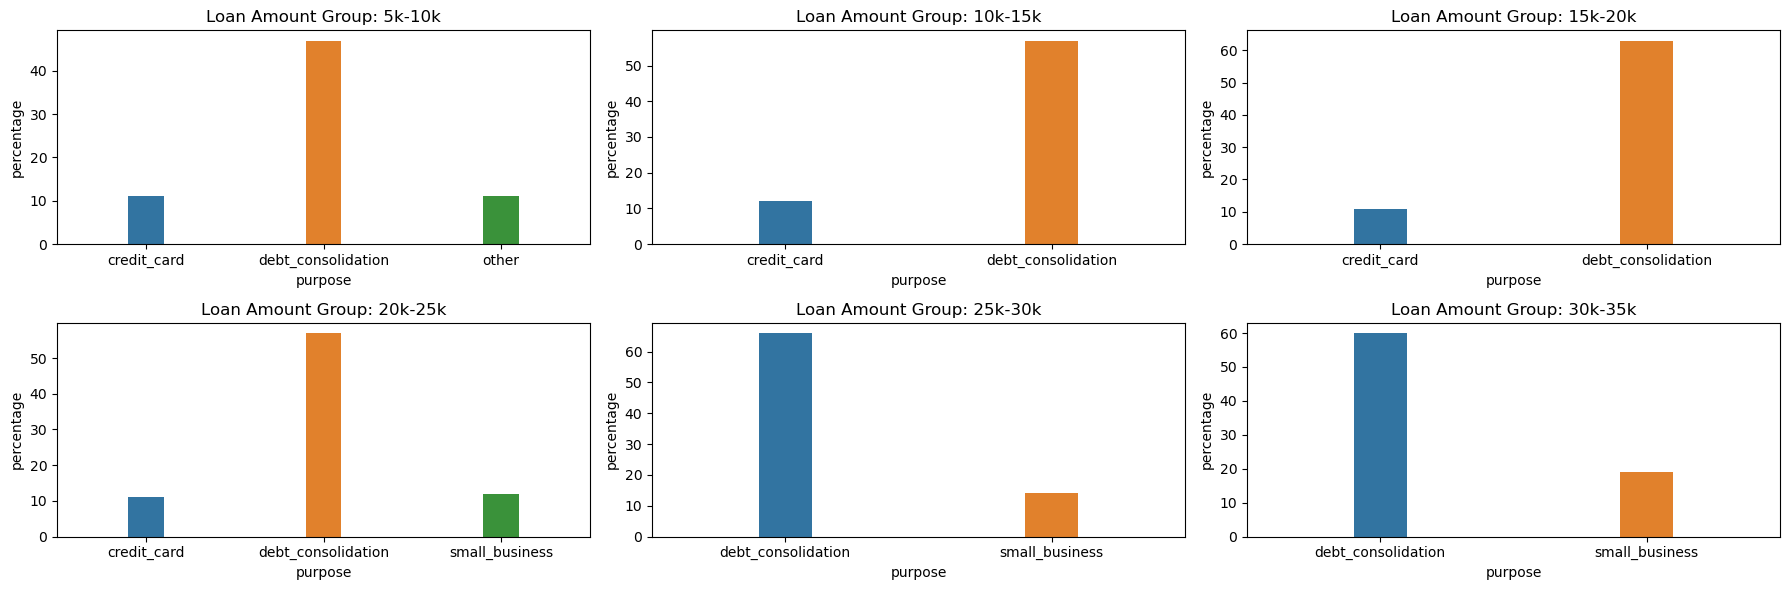

In [258]:
# for each loan amount group find the top percentage of loan purpose and plot the bar chart

loan_15g = loan_g2[loan_g2['percentage'] > 10]
loan_15g_list = list(loan_15g.index.get_level_values('loan_amnt_groups').unique())
fig, axes = plt.subplots(2,3, figsize=(18,6))
sns.barplot(x=loan_15g.loc[loan_15g_list[1]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[1]]['percentage'], ax=axes[0,0], width=0.2)
axes[0,0].set_title('Loan Amount Group: 5k-10k')
sns.barplot(x=loan_15g.loc[loan_15g_list[2]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[2]]['percentage'], ax=axes[0,1], width=0.2)
axes[0,1].set_title('Loan Amount Group: 10k-15k')
sns.barplot(x=loan_15g.loc[loan_15g_list[3]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[3]]['percentage'], ax=axes[0,2], width=0.2)
axes[0,2].set_title('Loan Amount Group: 15k-20k')
sns.barplot(x=loan_15g.loc[loan_15g_list[4]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[4]]['percentage'], ax=axes[1,0], width=0.2)
axes[1,0].set_title('Loan Amount Group: 20k-25k')
sns.barplot(x=loan_15g.loc[loan_15g_list[5]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[5]]['percentage'], ax=axes[1,1], width=0.2)
axes[1,1].set_title('Loan Amount Group: 25k-30k')
sns.barplot(x=loan_15g.loc[loan_15g_list[6]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[6]]['percentage'], ax=axes[1,2], width=0.2)
axes[1,2].set_title('Loan Amount Group: 30k-35k')
plt.tight_layout()

plt.show()




**Inference**: in the loan amount range of 30-35K, ~80% is from Debt Consolidation and Small Business. Small Business with high loan amount is also risky

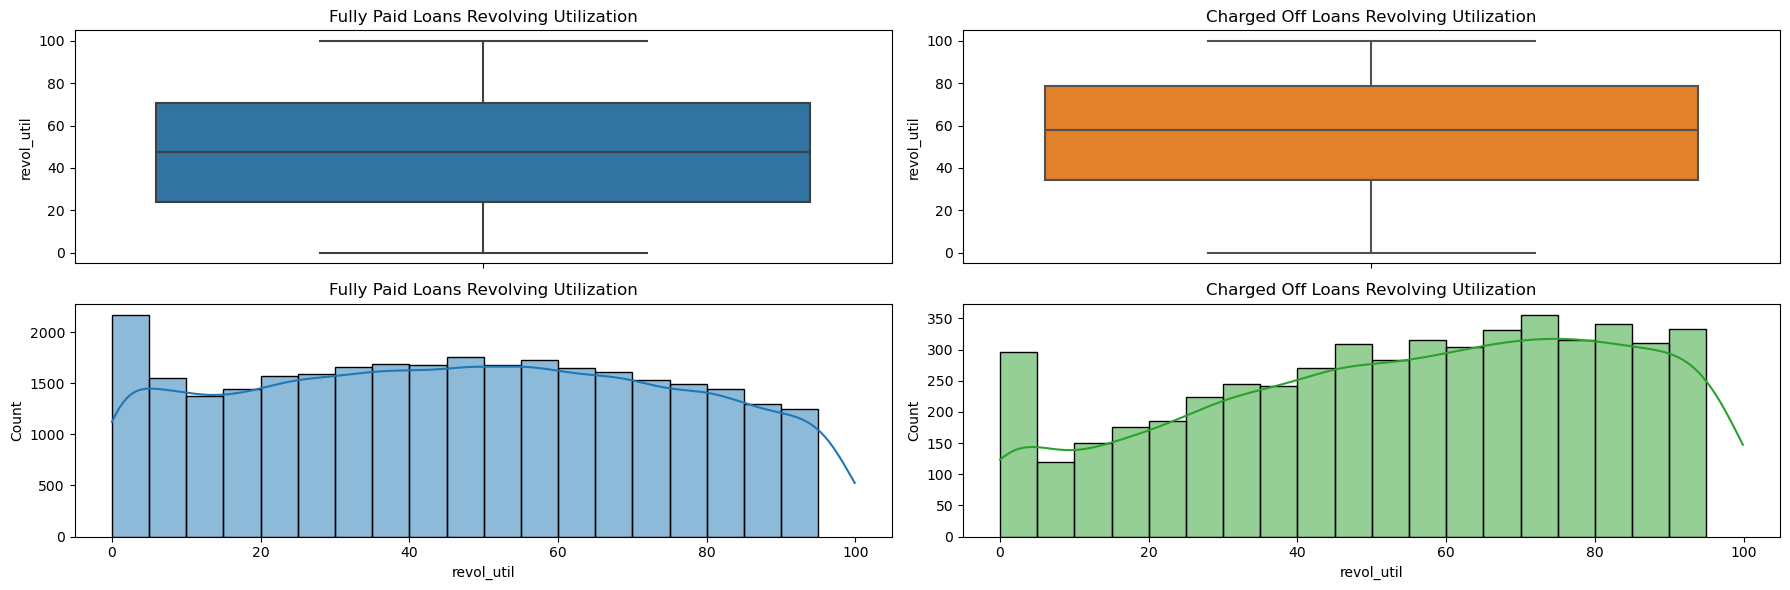

In [259]:
# analyise revol_util distribution using box plot and histplot with KDE

fig, axes = plt.subplots(2,2, figsize=(18,6))
sns.boxplot(y='revol_util', data=loan[loan.loan_status!='Charged Off'], ax=axes[0,0], color=colors[0])
axes[0,0].set_title('Fully Paid Loans Revolving Utilization')
sns.histplot(loan.loc[loan.loan_status!='Charged Off']['revol_util'], bins=range(0, 100, 5), kde=True, ax=axes[1,0])
axes[1,0].set_title('Fully Paid Loans Revolving Utilization')
sns.boxplot(y='revol_util', data=loan_def, ax=axes[0,1], color=colors[1])
axes[0,1].set_title('Charged Off Loans Revolving Utilization')
sns.histplot(loan_def['revol_util'], bins=range(0, 100, 5), kde=True, ax=axes[1,1], color=colors[2])
axes[1,1].set_title('Charged Off Loans Revolving Utilization')
plt.tight_layout()
plt.show()


**Inference**: from the above plots: Defaulters have higher revolving utilization rate compared to non defaulters

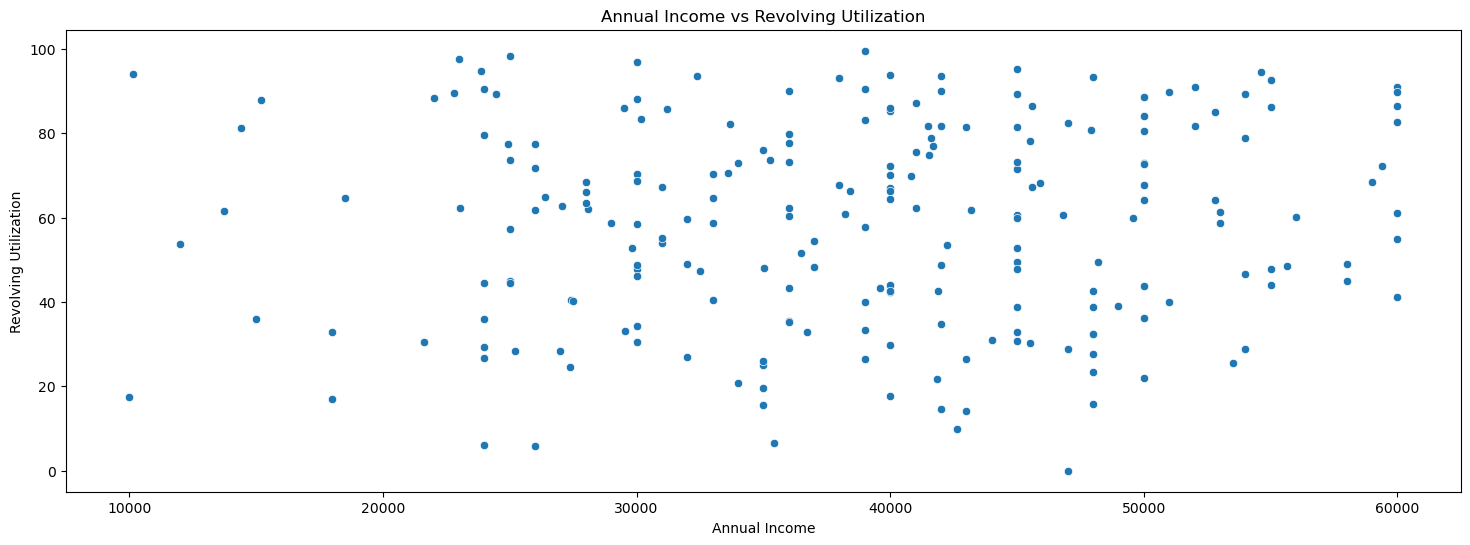

In [260]:
# Analyse revol_util distribution for defaulters for loan amount range 0-13000 and annual income range upto 60K

loan_def2 = loan_def[(loan_def['loan_amnt'] <= 13000) & (loan_def['annual_inc'] <= 60000) & (loan_def['purpose'] == 'credit_card')]
plt.figure(figsize=(18,6))
sns.scatterplot(x='annual_inc', y='revol_util', data=loan_def2)
plt.xlabel('Annual Income')
plt.ylabel('Revolving Utilization')
plt.title('Annual Income vs Revolving Utilization')

plt.show()

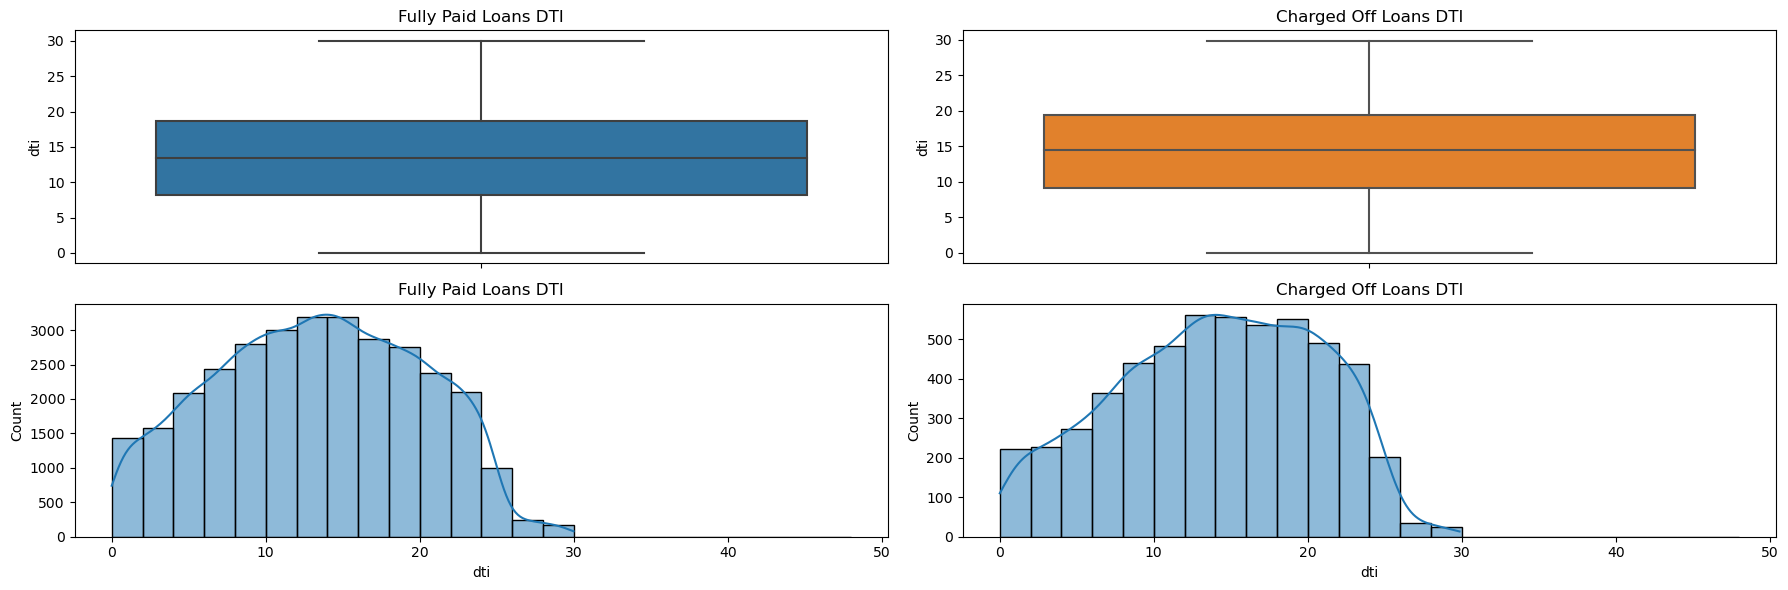

In [261]:
# Analyse DTI distribution using box plot and histplot with KDE

fig, axes = plt.subplots(2,2, figsize=(18,6))
sns.boxplot(y='dti', data=loan[loan.loan_status!='Charged Off'], ax=axes[0,0], color=colors[0])
axes[0,0].set_title('Fully Paid Loans DTI')
sns.histplot(loan.loc[loan.loan_status!='Charged Off']['dti'], bins=range(0, 50, 2), kde=True, ax=axes[1,0])
axes[1,0].set_title('Fully Paid Loans DTI')
sns.boxplot(y='dti', data=loan_def, ax=axes[0,1], color=colors[1])
axes[0,1].set_title('Charged Off Loans DTI')
sns.histplot(loan_def['dti'], bins=range(0, 50, 2), kde=True, ax=axes[1,1])
axes[1,1].set_title('Charged Off Loans DTI')
plt.tight_layout()
plt.show()

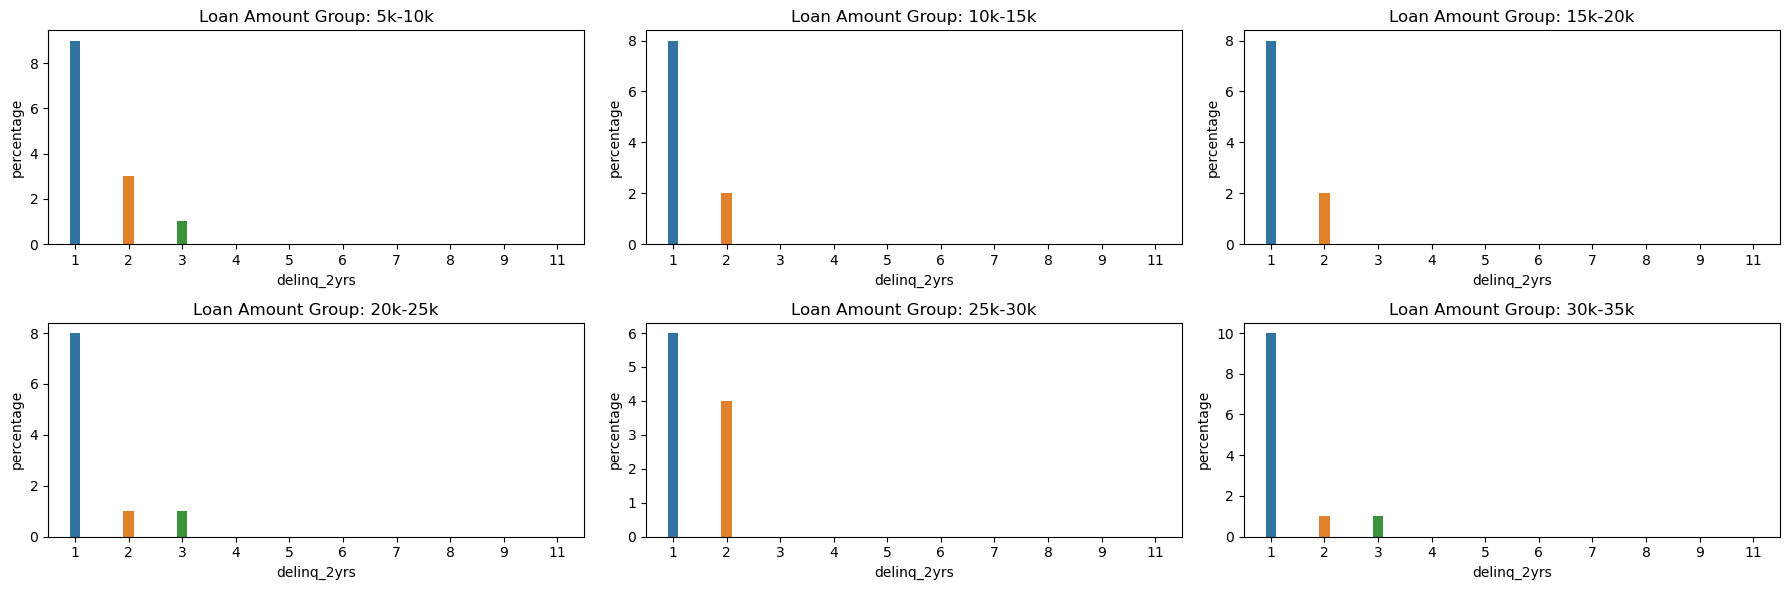

In [262]:
#Plot graph with loan amount  rnage and delinq_2yrs

loan_g3 = loan.groupby(['loan_status','loan_amnt_groups','delinq_2yrs'])['loan_amnt_groups'].count()
loan_counts3 =loan.groupby(['loan_amnt_groups','delinq_2yrs'])['loan_amnt_groups'].count()
#plot graph how delinq_2yrs is affecting the loan amount group

loan_g4 =pd.DataFrame(loan_g3['Charged Off'])
loan_g4.loc[:,:].loan_amnt_groups =loan_g4.loc[:,:].loan_amnt_groups.astype(int)
loan_g4.rename(columns={'loan_amnt_groups':'count'}, inplace=True)
loan_g4['percentage'] = round(loan_g4['count']/group_count.loc[loan_g4.index.get_level_values('loan_amnt_groups')].values*100)  
loan_g4['percentage'] = loan_g4['percentage'].astype(float)
loan_g4 =loan_g4[loan_g4['percentage'] < 20]
loan_g4_list = list(loan_g4.index.get_level_values('loan_amnt_groups').unique())
fig, axes = plt.subplots(2,3, figsize=(18,6))
sns.barplot(x=loan_g4.loc[loan_g4_list[1]].index.get_level_values('delinq_2yrs'), y=loan_g4.loc[loan_g4_list[1]]['percentage'], ax=axes[0,0], width=0.2)
axes[0,0].set_title('Loan Amount Group: 5k-10k')
sns.barplot(x=loan_g4.loc[loan_g4_list[2]].index.get_level_values('delinq_2yrs'), y=loan_g4.loc[loan_g4_list[2]]['percentage'], ax=axes[0,1], width=0.2)
axes[0,1].set_title('Loan Amount Group: 10k-15k')
sns.barplot(x=loan_g4.loc[loan_g4_list[3]].index.get_level_values('delinq_2yrs'), y=loan_g4.loc[loan_g4_list[3]]['percentage'], ax=axes[0,2], width=0.2)
axes[0,2].set_title('Loan Amount Group: 15k-20k')
sns.barplot(x=loan_g4.loc[loan_g4_list[4]].index.get_level_values('delinq_2yrs'), y=loan_g4.loc[loan_g4_list[4]]['percentage'], ax=axes[1,0], width=0.2)
axes[1,0].set_title('Loan Amount Group: 20k-25k')
sns.barplot(x=loan_g4.loc[loan_g4_list[5]].index.get_level_values('delinq_2yrs'), y=loan_g4.loc[loan_g4_list[5]]['percentage'], ax=axes[1,1], width=0.2)
axes[1,1].set_title('Loan Amount Group: 25k-30k')
sns.barplot(x=loan_g4.loc[loan_g4_list[6]].index.get_level_values('delinq_2yrs'), y=loan_g4.loc[loan_g4_list[6]]['percentage'], ax=axes[1,2], width=0.2)
axes[1,2].set_title('Loan Amount Group: 30k-35k')
plt.tight_layout()
plt.show()



**Inference**: Missing out on Installment payment increased with higher loan amount

In [263]:
loan_g4.head()

count  percentage
loan_amnt_groups delinq_2yrs                   
0-5k             1              145        11.0
                 2               26         2.0
                 3               13         1.0
                 4                7         1.0
                 5                1         0.0

In [264]:
loan_def['interest_groups'].unique()

['15-20', '25-30', '10-15', '5-10', '20-25']
Categories (5, object): ['5-10' < '10-15' < '15-20' < '20-25' < '25-30']

In [265]:
loan_def.columns

Index(['annual_inc', 'loan_status', 'loan_amnt', 'emp_length', 'funded_amnt',
       'funded_amnt_inv', 'term', 'issue_d', 'int_rate', 'installment',
       'grade', 'sub_grade', 'dti', 'delinq_2yrs', 'home_ownership',
       'revol_util', 'purpose', 'verification_status', 'pub_rec_bankruptcies',
       'issue_date', 'issue_month', 'issue_year', 'annual_inc_groups',
       'loan_amnt_groups', 'interest_groups', 'sub_grade_groups'],
      dtype='object')

**Inference**: Interest Rate increases with Loan Amount. Higher interest rate leades to Defaulting as well. Almost 50% loans in higher loan amount gets defaulted. Higher Loan * High interest is risky


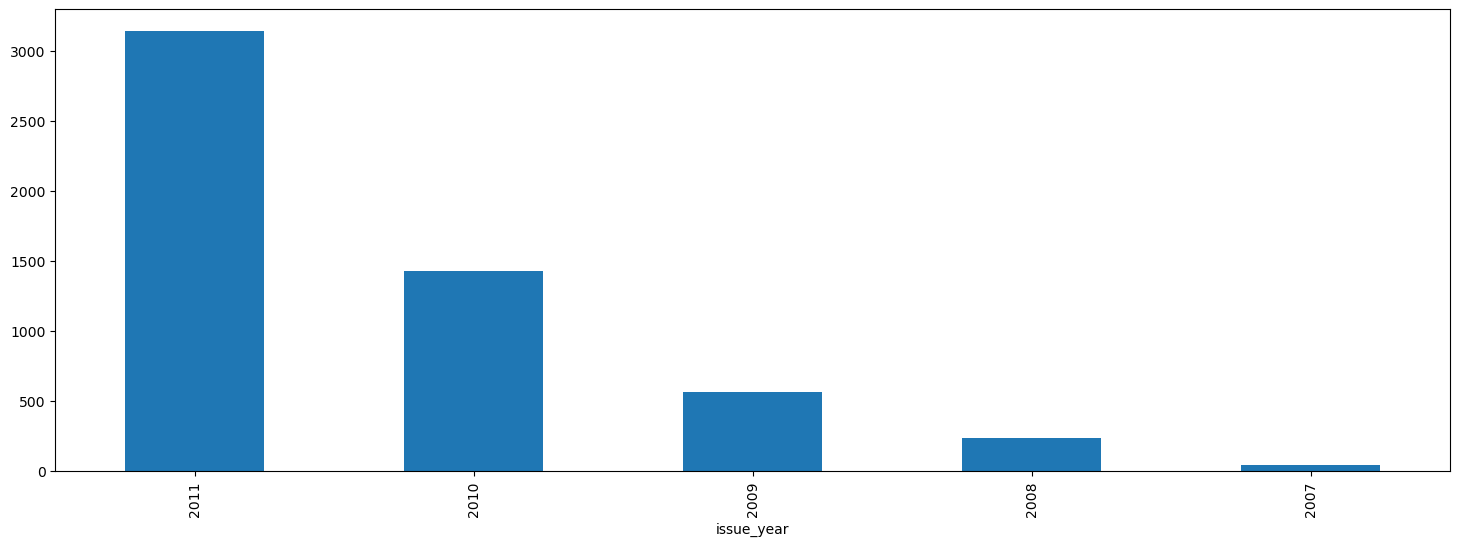

In [266]:
plt.figure(figsize=(18,6))
loan_def['issue_year'].value_counts().plot.bar()
plt.show()

**Inference**: Most of the loans that are defaulted were issued in year 2011. Was there an second economic slowdown?

In [267]:
# funded amount vs funded amount invested and interest rate for defaulters

#find correaltion

loan_def[['funded_amnt','funded_amnt_inv','int_rate']].corr().round(2)

,funded_amnt,funded_amnt_inv,int_rate
funded_amnt,1.00,0.93,0.34
funded_amnt_inv,0.93,1.00,0.36
int_rate,0.34,0.36,1.00


#### Considering only the grades E, F, G - the lower Credit Grades to analyse behavior of borrowers. Even though the count of loans are less, analysis is done to find the trend. 
In this range, Loan Paid and Loan Charged off percentages were almost same

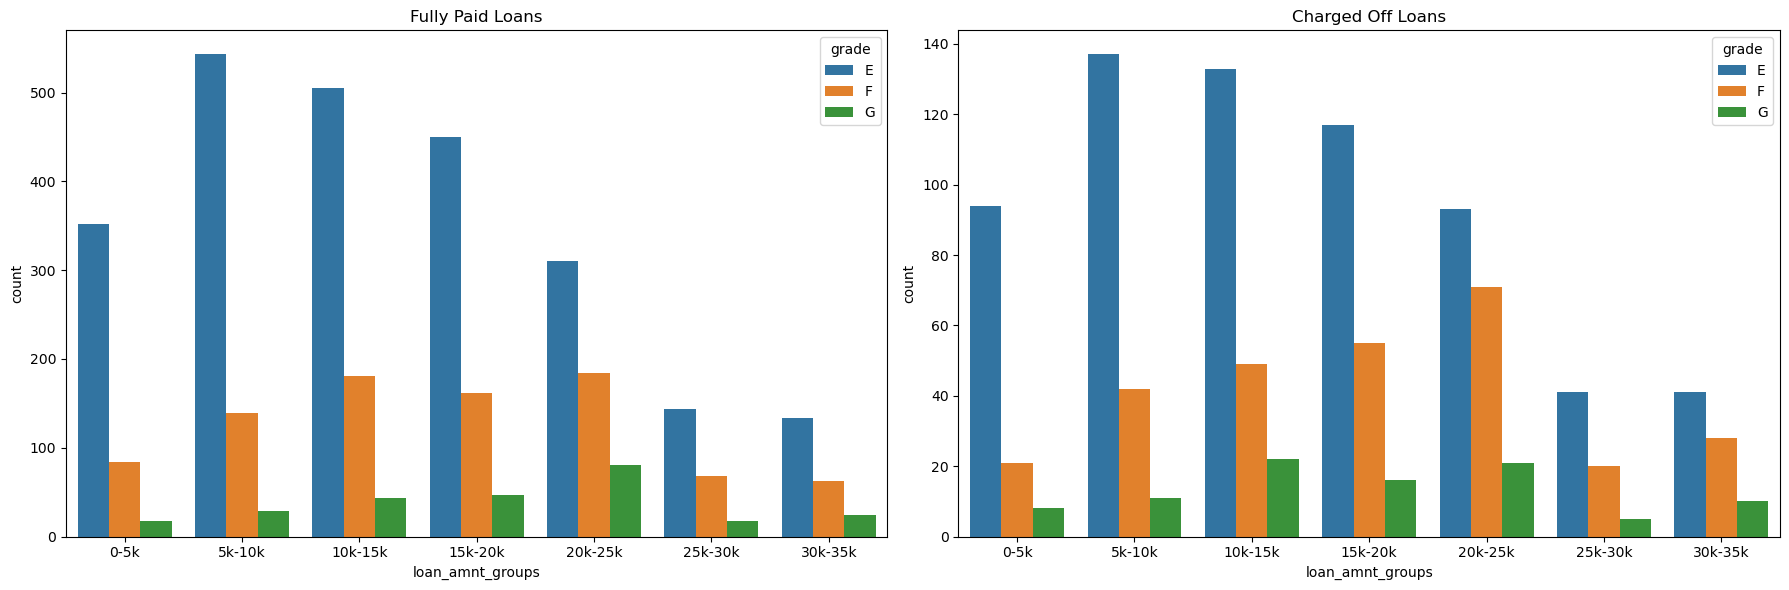

In [268]:
# Grade vs loan amount group


fig,axis = plt.subplots(1,2, figsize=(18,6))
sns.countplot(x='loan_amnt_groups', data=loan_def[(loan_def['grade'] =='E') | (loan_def['grade'] =='F' ) | (loan_def['grade'] =='G')], hue ='grade',ax=axis[1], hue_order=['E','F','G'])
sns.countplot(x='loan_amnt_groups', data=loan[(loan['grade'] =='E') | (loan['grade'] =='F' ) | (loan['grade'] =='G')], hue ='grade',ax=axis[0], hue_order=['E','F','G'])
axis[1].set_title('Charged Off Loans')
axis[0].set_title('Fully Paid Loans')
plt.tight_layout()
plt.show()

***Inference***: Loans for lower credit grade is risker in the range of 20k-35k. ~ 70% of these loans are availed for Debt Consolidation or Small Business. Small Business in Higher range is Risky for lenders

##### Loan Purpose Vs Home Ownership status

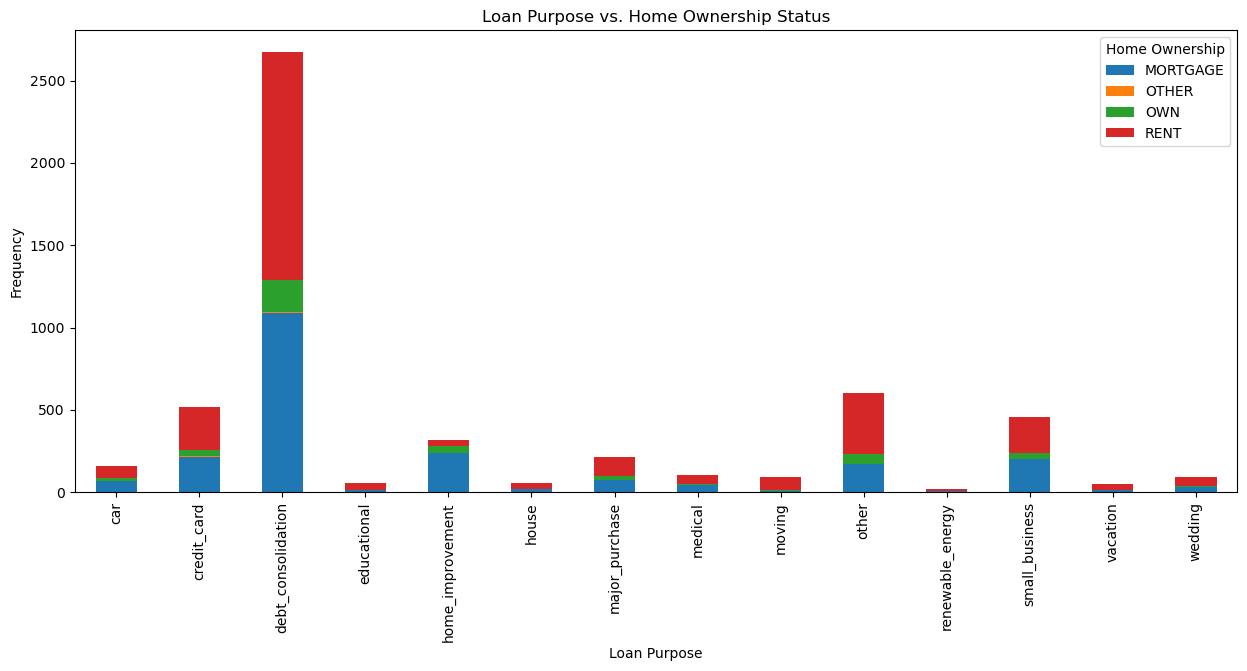

In [269]:
#Loan Purpose Vs Home Ownership status

cross_tab = pd.crosstab(loan_def['purpose'], loan_def['home_ownership'])
cross_tab.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Loan Purpose vs. Home Ownership Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Home Ownership')
plt.show()

**Inference**: Most loans that are charged off are held by individuals who either rent or have a mortgage. This could suggest that the financial burden of a mortgage or rent, combined with additional loan obligations, might stretch financial capacities, leading to defaults.

#### Analyse Employment Duration, Loan Amount, Interest Rate, Purpose, Credit Grade of Defaulters, to identify a pattern


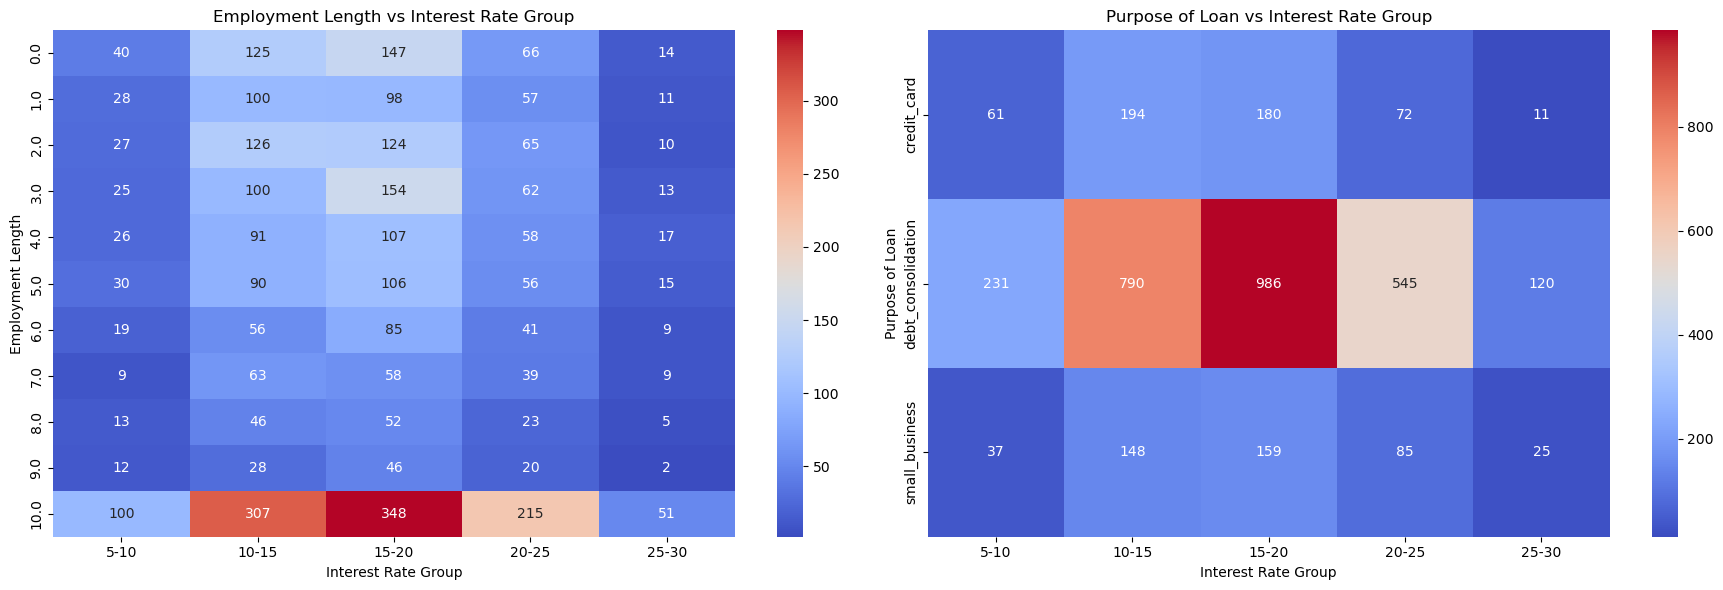

In [270]:
fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.heatmap(loan_def[(loan_def.purpose =='credit_card') | (loan_def.purpose =='debt_consolidation') | (loan_def.purpose =='small_business')].groupby(['emp_length','interest_groups']).size().unstack(), annot=True, fmt='d', cmap='coolwarm', ax=axes[0])
sns.heatmap(loan_def[(loan_def.purpose =='credit_card') | (loan_def.purpose =='debt_consolidation') | (loan_def.purpose =='small_business')].groupby(['purpose','interest_groups']).size().unstack(), annot=True, fmt='d', cmap='coolwarm', ax=axes[1])
axes[0].set_title('Employment Length vs Interest Rate Group')
axes[1].set_title('Purpose of Loan vs Interest Rate Group')
axes[0].set_xlabel('Interest Rate Group')
axes[1].set_xlabel('Interest Rate Group')
axes[0].set_ylabel('Employment Length')
axes[1].set_ylabel('Purpose of Loan')
plt.tight_layout()
plt.show()

***Inference*** : Debt Consolidation with employment length of 10+ years and interest rate group 10-15 has the highest number of defaulters. **Risky**

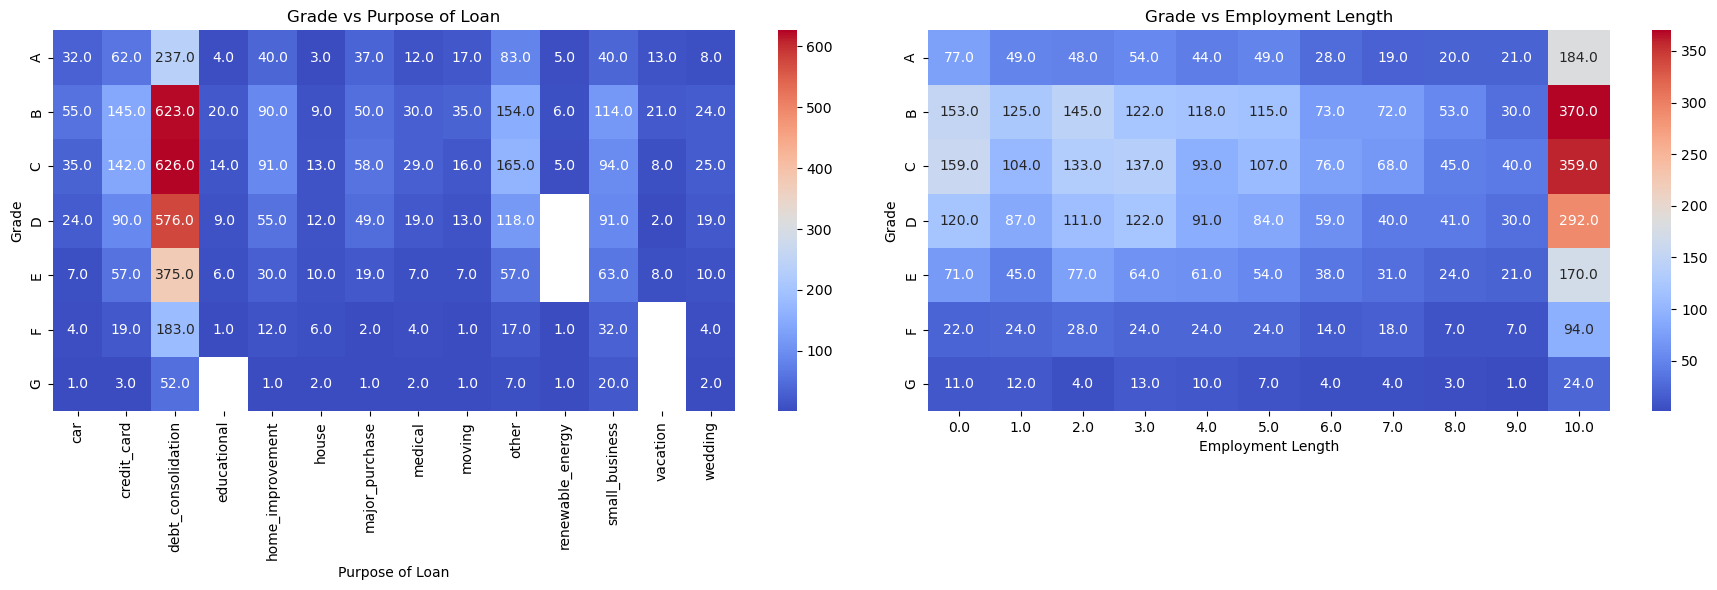

In [271]:
#loan Grade vs Purpose of loan  vs emp_length for defaulters heatmap

fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.heatmap(loan_def.groupby(['grade','purpose']).size().unstack(), annot=True, fmt='.1f', cmap='coolwarm', ax=axes[0])
sns.heatmap(loan_def.groupby(['grade','emp_length']).size().unstack(), annot=True, fmt='.1f', cmap='coolwarm', ax=axes[1])
axes[0].set_title('Grade vs Purpose of Loan')
axes[1].set_title('Grade vs Employment Length')
axes[0].set_xlabel('Purpose of Loan')
axes[1].set_xlabel('Employment Length')
axes[0].set_ylabel('Grade')
axes[1].set_ylabel('Grade')
plt.tight_layout()
plt.show()

***Inferences***: Debt Consolidation with Loan grade in B, C D with employment length of 10+ years are the major defaulters.

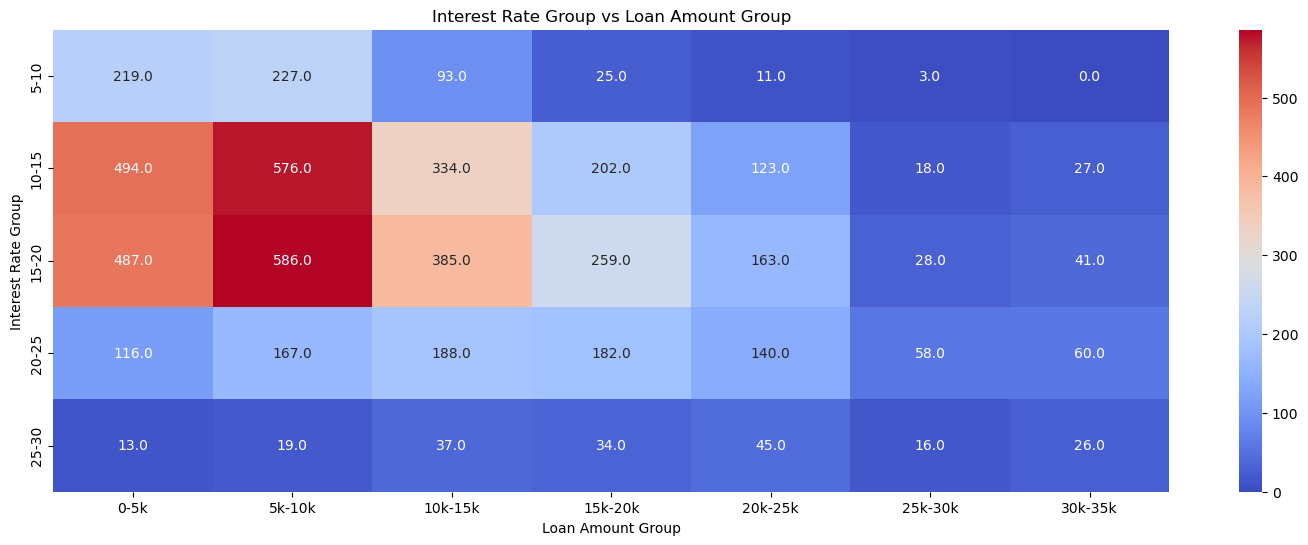

In [272]:
#interest rate vs loan amount group vs grade for defaulters

plt.figure(figsize=(18,6))
sns.heatmap(loan_def.groupby(['interest_groups','loan_amnt_groups']).size().unstack(), annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Interest Rate Group vs Loan Amount Group')
plt.xlabel('Loan Amount Group')
plt.ylabel('Interest Rate Group')
plt.show()


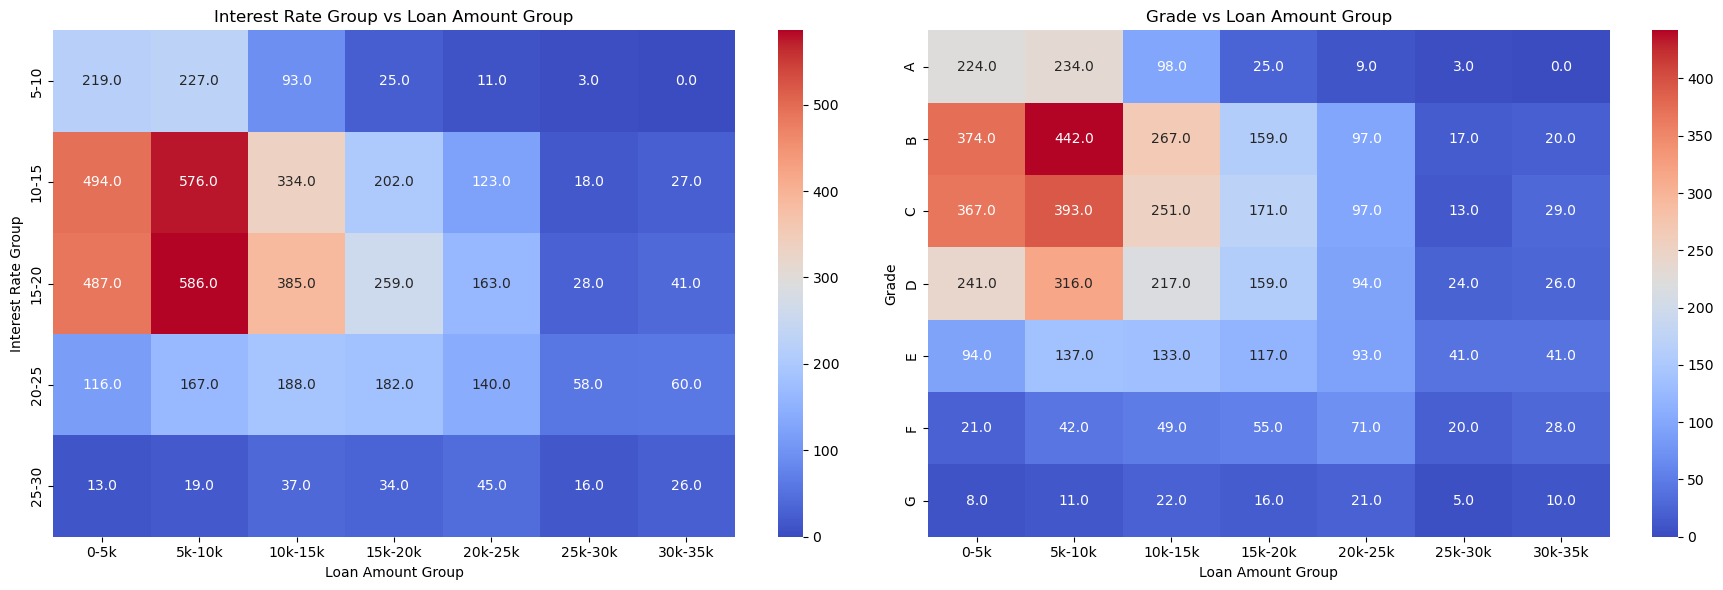

In [273]:
fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.heatmap(loan_def.groupby(['interest_groups','loan_amnt_groups']).size().unstack(), annot=True, fmt='.1f', cmap='coolwarm', ax=axes[0])
sns.heatmap(loan_def.groupby(['grade','loan_amnt_groups']).size().unstack(), annot=True, fmt='.1f', cmap='coolwarm', ax=axes[1])
axes[0].set_title('Interest Rate Group vs Loan Amount Group')
axes[1].set_title('Grade vs Loan Amount Group')
axes[0].set_xlabel('Loan Amount Group')
axes[1].set_xlabel('Loan Amount Group')
axes[0].set_ylabel('Interest Rate Group')
axes[1].set_ylabel('Grade') 
plt.tight_layout()
plt.show()

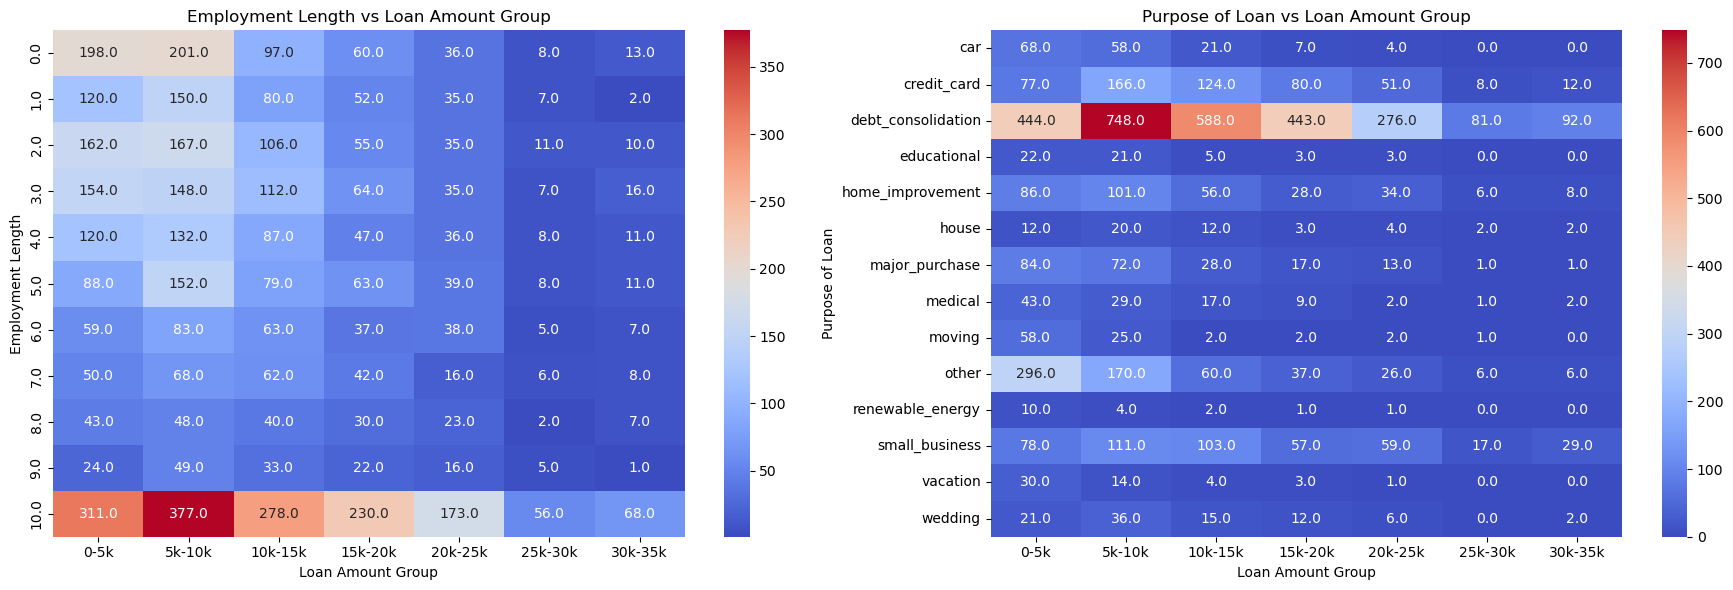

In [274]:
fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.heatmap(loan_def.groupby(['emp_length','loan_amnt_groups']).size().unstack(), annot=True, fmt='.1f', cmap='coolwarm', ax=axes[0])
sns.heatmap(loan_def.groupby(['purpose','loan_amnt_groups']).size().unstack(), annot=True, fmt='.1f', cmap='coolwarm', ax=axes[1])
axes[0].set_title('Employment Length vs Loan Amount Group')
axes[1].set_title('Purpose of Loan vs Loan Amount Group')
axes[0].set_xlabel('Loan Amount Group')
axes[1].set_xlabel('Loan Amount Group')
axes[0].set_ylabel('Employment Length')
axes[1].set_ylabel('Purpose of Loan')
plt.tight_layout()
plt.show()


***Inference***: **10+** Years Employement length with interest in the range of **10%-20%**, with credit grade of **B,C & D** with loan value in the rage of **5k-20K**, with loan purpose as **Debt Consolidation** are the riskiest loan
 

### Conclusion of Bi Variate Analysis


1. **Loan Amount for Defaulters**
   - Loan amount for defaulters ranges between **20%-35% of annual income** in general.

2. **Correlation between Loan Amount and Annual Income**
   - Loan amount and annual income are **weakly correlated**. Ideally, the loan amount should have been based on annual income.

3. **Impact of Economic Conditions**
   - Most of the loans that are defaulted were issued in the **year 2011**. Was there a second economic slowdown?

4. **Impact of Housing Costs**
   - Most loans that are charged off are held by individuals who either **rent or have a mortgage**. This could suggest that the financial burden of a mortgage or rent, combined with additional loan obligations, might stretch financial capacities, leading to defaults.

5. **Loan Amount and Annual Income Distribution**
   - Most of the loans that are charged off are scattered around **~10K loan amount with annual income around 20-40K**. When the loan amount is **1/5th of annual income**, the possibility of defaulting increases.

6. **Interest Rates and Default Rates**
   - The **median interest rate** for defaulters is higher than that of all loans, indicating that interest rate impacts loan payment. Almost **50% of loans** in the higher loan amount category get defaulted. **Higher loan amounts and high interest rates** are risky.

7. **Loan Granted vs Charged Off**
   - When comparing loan granted vs. charged off, **30% of loans are charged off** for loan amounts in the range of **30-35K**, compared to an overall charged off percentage of **16%**.

8. **Purpose of High Loan Amounts**
   - Approximately **80% of charged off loans** for the loan amount group **30-35K** are from **debt consolidation and small business**. Small businesses with high loan amounts are also risky.

9. **High-Risk Loan Profiles**
   - Loans with a **10+ year employment length**, **interest rates in the range of 10%-20%**, **credit grades of B, C, and D**, and **loan values in the range of 5K-20K**, with the purpose of **debt consolidation**, are the riskiest loans.

